# **Mikrotrans Gratis, Tapi Untuk Siapa?**

## Latar Belakang dan Rumusan Masalah

### **Latar Belakang**

Dalam sistem transportasi publik Jakarta, Mikrotrans hadir sebagai layanan pendukung (feeder) untuk memperluas cakupan layanan utama Transjakarta. Mikrotrans dioperasikan dengan tarif nol rupiah yang bertujuan meningkatkan aksesibilitas dan menjangkau masyarakat di kawasan pemukiman padat serta wilayah yang tidak terjangkau bus besar.

Namun, hadirnya mikrotrans juga memunculkan pertanyaan penting: apakah Mikrotrans hanya sekadar berperan sebagai pengumpan ke rute utama Transjakarta, atau benar-benar digunakan untuk mobilitas mandiri warga sekitar?

Lebih jauh, perlu dievaluasi apakah layanan ini benar-benar sudah menjangkau seluruh wilayah jakarta sehingga semua orang bisa menikmati layanan ini, atau justru terdapat ketidaksesuaian layanan antar wilayah di jakarta. 

### **Rumusan Masalah**
Berdasarkan latar belakang tersebut, rumusan masalah yang ingin dijawab antara lain:

1. **Demografi Pengguna**
    - Siapa kelompok usia terbanyak yang menggunakan mikrotrans?
    - Apakah pengguna mikrotrans lebih banyak laki-laki atau perempuan?
    - Apakah ada hubungan tarif yang ditetapkan dengan usia pengguna dalam memilih transportasi?

2. **Waktu dan Pola Perjalanan**
    - Bagaimana pola jam sibuk penggunaan Mikrotrans sepanjang hari?
    - Apakah rata-rata durasi perjalanan Mikrotrans meningkat secara pada jam sibuk?
    - Apakah terdapat perbedaan signifikan dalam rata-rata durasi perjalanan antar jam perjalanan (jam tap-in)?
    - Apakah mikrotrans lebih banyak digunakan saat weekday atau weekend?
    - Apakah terdapat perbedaan signifikan dalam pola penggunaan Mikrotrans antara hari kerja (weekday) dan akhir pekan (weekend)?
    - Apakah Mikrotrans digunakan secara konsisten sepanjang minggu, atau terdapat hari-hari dengan lonjakan/turun drastis?

3. **Wilayah dan Aksesibilitas**
    - Kecamatan mana saja yang paling banyak menggunakan mikrotrans?
    - Apakah ada kecamatan yang tidak memiliki akses terhadap mikrotrans?

4. **Perilaku Pengguna dan Tap Out**
    - Apakah tingkat gagal tap out pada mikrotrans lebih tinggi dibanding moda lain?
    - Apakah ada perbedaan rata-rata usia pengguna yang kemungkinan sukses dan gagal tap out?
    - Kelompok Usia mana yang banyak gagal dalam melakukan tap out

## **Data**
untuk menjawab pertanyaan diatas, kita akan mengimport dan menganalisa data yang dimiliki perusahaan. Dataset tersedia pada link ini : Data Transaksi Transjakarta

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as mingo
 
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset
df_tije = pd.read_csv('Transjakarta.csv')

# Copy original dataset
df_tije_original = df_tije.copy()

Berikut adalah informasi yang termuat dalam dataset:

1.	transID: ID Transaksi unik setiap transaksi.
2.	payCardID: Kartu yang digunakan customer untuk keluar dan masuk.
3.	payCardBank: Nama bank yang menerbitkan kartu.
4.	payCardName: Nama customer yang tertera pada kartu.
5.	payCardSex: Jenis kelamin customer yang tertera pada kartu.
6.	payCardBirthDate: Tahun kelahiran cutomer.
7.	corridorID: ID koridor atau rute sebagai kunci untuk pengelompokan rute.
8.	corridorName: Nama koridor/rute, mencakup titik awal dan akhir setiap rute.
9.	direction: Arah rute: 0 untuk pergi, dan 1 untuk kembali
10.	tapInStops: ID untuk mengidentifikasi nama pemberhentian ketika tap-in.
11.	tapInStopsName: Nama pemberhentian customer ketika tap-in.
12.	tapInStopsLat: Lintang pemberhentian tap-in.
13.	tapInStopsLon: Bujur pemberhentian tap-in.
14.	stopStartSeq: Urutan pemberhentian, pemberhentian pertama, kedua dan seterusnya. Sesuai dengan arah perjalanannya.
15.	tapInTime: Waktu tap-in (tanggal dan jam)
16.	tapOutStops: ID untuk mengidentifikasi nama pemberhentian ketika tap-out.
17.	tapOutStopsName: Nama pemberhentian customer ketika tap-out.
18.	tapOutStopsLat: Lintang pemberhentian tap-in.
19.	tapOutStopsLon: Bujur pemberhentian tap-in.
20.	stopEndSeq: Urutan pemberhentian, pemberhentian pertama, kedua dan seterusnya. Sesuai dengan arah perjalanannya.
21.	tapOutTime: Waktu tap-in (tanggal dan jam)
22.	payAmount: Jumlah tarif yang harus dibayar customer, beberapa gratis dan beberapa tidak.

## **Data Understanding dan Cleaning**
Sebelum melakukan analysis, kita perlu memahami dataset terlebih dahulu dalam tahapan *Data Understanding* agar diketahui anomali-anomali yang ada di dalam data serta bagaimana kita akan menanganinya dalam tahapan *Data Cleaning*.

In [2]:
display(df_tije.head(), df_tije.tail())

transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   
3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4              1982         12                     Tanjung Priok - Pluit   

   direction tapInStops  ... tapInStopsLon  stopStartSeq            tapInTime  \
0        1.0     P00142  ...     106.84402             7  2023-04-03 05:21:44   
1        0.0    B01963P  ...     106.83302            13  2023-04-03 05:42:44   
2        0.0    B00499P  ...     106.81435            38  2023-04-03 05:59:06   
3        0.0    B05587P  ...     106.93526            23  2023-04-03 05:44:51   
4        0.0     P00239  ...     106.88900             5  2023-04-03 06:17:35   

   tapOutStops        tapOutStopsName tapOutStopsLat tapOutStopsLon  \
0       P00253                Tegalan      -6.203101      106.85715   
1      B03307P    Sampoerna Strategic      -6.217152      106.81892   
2      B04962P  Simpang Kunir Kemukus      -6.133731      106.81475   
3      B03090P      Raya Penggilingan      -6.183068      106.93194   
4       P00098       Kali Besar Barat      -6.135355      106.81143   

   stopEndSeq           tapOutTime  payAmount  
0        12.0  2023-04-03 06:00:53     3500.0  
1        21.0  2023-04-03 06:40:01     3500.0  
2        39.0  2023-04-03 06:50:55     3500.0  
3        29.0  2023-04-03 06:28:16     3500.0  
4        15.0  2023-04-03 06:57:03     3500.0  

[5 rows x 22 columns]

transID            payCardID payCardBank  \
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex  payCardBirthDate corridorID  \
37895         Kamila Mahendra          F              2004         6B   
37896            Titi Siregar          M              1974         9N   
37897  drg. Zahra Nashiruddin          F              1976         1T   
37898            Ana Agustina          M              1976     JAK.13   
37899       drg. Leo Najmudin          F              1985         13   

                            corridorName  direction tapInStops  ...  \
37895  Ragunan - MH Thamrin via Semanggi        1.0     P00261  ...   
37896             Pinang Ranti - Pramuka        1.0     P00064  ...   
37897               Cibubur - Balai Kota        1.0    B02873P  ...   
37898        Tanah Abang - Jembatan Lima        1.0    B02505P  ...   
37899                  Ciledug - Tendean        0.0     P00001  ...   

      tapInStopsLon  stopStartSeq            tapInTime  tapOutStops  \
37895     106.82309             2  2023-04-21 18:18:37       P00228   
37896     106.88116             1  2023-04-18 21:52:31       P00179   
37897     106.81676            12  2023-04-04 10:29:47      B00226P   
37898     106.80954            33  2023-04-15 19:59:26      B01787P   
37899     106.74786             2  2023-04-12 21:08:12       P00106   

       tapOutStopsName tapOutStopsLat tapOutStopsLon  stopEndSeq  \
37895           SMK 57      -6.290967      106.82365        13.0   
37896     Pinang Ranti      -6.291075      106.88634         2.0   
37897  Buperta Cibubur      -6.370321      106.89628        14.0   
37898       JPO Blok G      -6.188861      106.81135        34.0   
37899   Kebayoran Lama      -6.238340      106.77752         7.0   

                tapOutTime  payAmount  
37895  2023-04-21 19:55:49     3500.0  
37896  2023-04-18 22:28:22     3500.0  
37897  2023-04-04 13:27:25    20000.0  
37898  2023-04-15 20:27:50        0.0  
37899  2023-04-12 21:34:53     3500.0  

[5 rows x 22 columns]

In [3]:
print(f'Jumlah Baris: {df_tije.shape[0]}')
df_tije.info()

Jumlah Baris: 37900
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36

In [4]:
display(df_tije.describe(), df_tije.describe(include='object'))

payCardID  payCardBirthDate     direction  tapInStopsLat  \
count  3.790000e+04      37900.000000  37900.000000   37900.000000   
mean   4.250060e+17       1990.089314      0.500633      -6.214838   
std    1.321699e+18         13.051482      0.500006       0.057911   
min    6.040368e+10       1946.000000      0.000000      -6.394973   
25%    1.800442e+14       1982.000000      0.000000      -6.245863   
50%    3.507947e+15       1990.000000      1.000000      -6.214587   
75%    4.699023e+15       2001.000000      1.000000      -6.175528   
max    4.997694e+18       2012.000000      1.000000      -6.089429   

       tapInStopsLon  stopStartSeq  tapOutStopsLat  tapOutStopsLon  \
count   37900.000000  37900.000000    36556.000000    36556.000000   
mean      106.841554     13.572480       -6.214651      106.841233   
std         0.060369     12.237623        0.059022        0.060999   
min       106.614730      0.000000       -6.394973      106.614730   
25%       106.803470      4.000000       -6.247225      106.801750   
50%       106.834830     10.000000       -6.214718      106.834580   
75%       106.882270     19.000000       -6.174736      106.883030   
max       107.023950     68.000000       -6.091746      107.023660   

         stopEndSeq     payAmount  
count  36556.000000  36893.000000  
mean      21.219909   2699.712683  
std       13.800689   4212.225592  
min        1.000000      0.000000  
25%       11.000000      0.000000  
50%       18.000000   3500.000000  
75%       29.000000   3500.000000  
max       77.000000  20000.000000

transID payCardBank         payCardName payCardSex corridorID  \
count            37900       37900               37900      37900      36643   
unique           37900           6                1993          2        221   
top     EIIW227B8L34VB         dki  Fathonah Saefullah          F         1T   
freq                 1       18743                  80      20157        400   

                corridorName tapInStops tapInStopsName            tapInTime  \
count                  35970      36687          37900                37900   
unique                   216       2570           2602                37079   
top     Cibubur - Balai Kota     P00170    Penjaringan  2023-04-25 06:23:00   
freq                     391        236            243                    3   

       tapOutStops tapOutStopsName           tapOutTime  
count        35611           36556                36556  
unique        2230            2248                35908  
top         P00016             BKN  2023-04-10 19:10:15  
freq           306             316                    3

In [5]:
pd.set_option('display.max_colwidth', None)

# data unik di tiap kolom
col_item = []
for col in df_tije.columns :
    col_item.append([col, df_tije[col].nunique(), df_tije[col].unique()])

df_tije_col = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=col_item)
df_tije_col

Column Name  Number of Unique  \
0            transID             37900   
1          payCardID              2000   
2        payCardBank                 6   
3        payCardName              1993   
4         payCardSex                 2   
5   payCardBirthDate                67   
6         corridorID               221   
7       corridorName               216   
8          direction                 2   
9         tapInStops              2570   
10    tapInStopsName              2602   
11     tapInStopsLat              2587   
12     tapInStopsLon              2458   
13      stopStartSeq                67   
14         tapInTime             37079   
15       tapOutStops              2230   
16   tapOutStopsName              2248   
17    tapOutStopsLat              2237   
18    tapOutStopsLon              2139   
19        stopEndSeq                74   
20        tapOutTime             35908   
21         payAmount                 3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Unique Sample  
0                                                                                                                                                                                                                                                                                                      

Dari beberapa informasi diatas, kita dapat melihat bahwa:
* Dataset Transjakarta (*df_tije*) memiliki 22 kolom dan 37.900 baris
* Kolom `tapInTime` dan `tapOutTime` memiliki data tipe object, namun nilai dari data tersebut berisi tanggal dan waktu. Agar data dapat digunakan untuk analisis lebih lanjut maka tipe data ini perlu di convert ke tipe datetime.
* Dari pengecekan `.info` teridentifikasi ada *null* pada kolom `corridorID, corridorName, tapInStops, tapOutStops, tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, tapOutTime, payAmount` yang akan kita coba identifikasi lebih lanjut pada tahap identifikasi *missing value*. 
* Semua nilai dari kolom terlihat konsisten sesuai dengan tipe datanya.
* Akan diperlukan kolom-kolom tambahan untuk mempermudah dalam hal analisis, misalnya hari transaksi untuk mengetahui weekday dan weekend, namun kolom-kolom tersebut akan dibuat dalam variabel lain pada saat analisis nantinya.

**# Merubah tipe data `tapInTime` dan `tapOutTime` ke format datetime**

In [6]:
# Conversi kolom yang berisi tanggal dan waktu ke tipe data datetime
df_tije['tapInTime'] = pd.to_datetime(df_tije['tapInTime'], errors='coerce')
df_tije['tapOutTime'] = pd.to_datetime(df_tije['tapOutTime'], errors='coerce')

print(df_tije[['tapInTime', 'tapOutTime']].dtypes)


tapInTime     datetime64[ns]
tapOutTime    datetime64[ns]
dtype: object


Data telah berhasil dirubah ke format datetime, sekarang kita bisa lanjutkan dengan mengidentifikasi dan menangani missing value.

### Missing Value

In [7]:
# Presentase missing value pada setiap kolom
misval_sum = df_tije.isnull().sum()
misval_perc = (df_tije.isnull().sum()/df_tije.shape[0] * 100).map('{:.2f}%'.format)

mis_val = pd.concat([misval_sum, misval_perc], axis=1)
mis_val.columns = ['missing_value', 'percentage']

display(mis_val, f'Total missing value: {misval_sum.sum()}')

missing_value percentage
transID                       0      0.00%
payCardID                     0      0.00%
payCardBank                   0      0.00%
payCardName                   0      0.00%
payCardSex                    0      0.00%
payCardBirthDate              0      0.00%
corridorID                 1257      3.32%
corridorName               1930      5.09%
direction                     0      0.00%
tapInStops                 1213      3.20%
tapInStopsName                0      0.00%
tapInStopsLat                 0      0.00%
tapInStopsLon                 0      0.00%
stopStartSeq                  0      0.00%
tapInTime                     0      0.00%
tapOutStops                2289      6.04%
tapOutStopsName            1344      3.55%
tapOutStopsLat             1344      3.55%
tapOutStopsLon             1344      3.55%
stopEndSeq                 1344      3.55%
tapOutTime                 1344      3.55%
payAmount                  1007      2.66%

'Total missing value: 14416'

<Axes: >

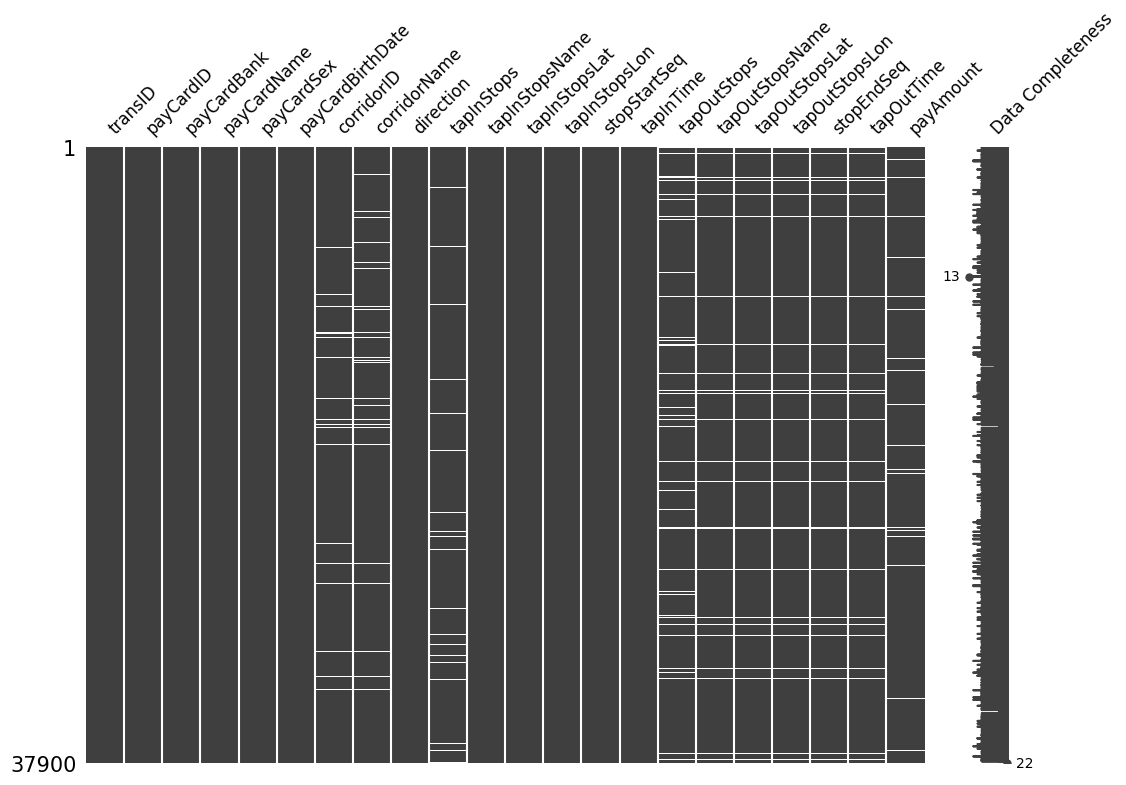

In [8]:
# Visualisasi sebaran missing value
mingo.matrix(df_tije, figsize=(12,8), fontsize=12, labels=True)

Dari pengecekan data diatas, dapat dilihat bahwa:
* *missing value* terkonfirmasi ada di beberapa kolom berikut beserta presentasenya: `corridorID (3.32%), corridorName (5.09%), tapInStops (3.20%), tapOutStops(6.04%), tapOutStopsName (3.55%), tapOutStopsLat (3.55%), tapOutStopsLon (3.55%), stopEndSeq (3.55%), tapOutTime (3.55%), payAmount (2.66%)`
* Dari 10 kolom yang memiliki missing value, hanya 2 yang memiliki presentase diatas atau sama dengan 5% dan sisanya dibawah 5%.
* Jika dilihat dari visualisasi *missing value*, kolom `tapOutStopsName (3.55%), tapOutStopsLat (3.55%), tapOutStopsLon (3.55%), stopEndSeq (3.55%), tapOutTime (3.55%)` memiliki sebaran yang terlihat berkaitan *(MAR)*, ini juga di kuatkan dengan presentase *missing value* mereka yang sama.
* Kolom `corridorID (3.32%)` dengan `corridorName (5.09%)` sepertinya juga saling terkait jika di pelajari dari nama kolom dan struktur datanya, dimana setiap `corridorName` memiliki `corridorID` yang unik.

Umumnya ada 2 cara untuk menangani *missing value*:
* Pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak dipertimbangkan dalam analisa kita kali ini karena presentase missing value yang rendah dan juga kolom missing value terlihat saling berkaitan.
* Kedua, mengisi data yang hilang, dimana cara ini lebih disarankan. Dalam analisa kali ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

**Setelah melihat gambaran anomali diatas, selanjutnya kita coba tangani satu persatu anomalinya.**

**Missing Value pada `corridorID` dan `corridorName`**

Berdasar dari hasil pengecekan diatas bahwa kedua kolom ini saling berkaitan dimana setiap 1 `corridorID` memiliki 1 `corridorName` atau sebaliknya, maka kita akan mengisi kolom yang kosong pada baris yang sama dengan referensi dari baris lain dimana salah satu antara ID atau Name sama.
Namun terlihat bahwa kedua kolom ini memiliki nilai null pada baris yang sama, oelh karena itu beberapa data null tidak dapat diisikan karena baris referensinya juga null, maka kita perlu gunakan pendekatan lain untuk mengisi datanya.

*- `corridorID`*

In [9]:
# Group by corridorID untuk melihat dan memastikan apakah 1 corridorID hanya memiliki 1 corridorName
cor_by_id = df_tije.groupby('corridorID')['corridorName'].nunique().reset_index()
cor_by_id.columns = ['corridorID', 'total_corridorName']
cor_by_id[cor_by_id['total_corridorName'] > 1]

Empty DataFrame
Columns: [corridorID, total_corridorName]
Index: []

Tidak ada total `corridorName` yang lebih dari 1 menunjukkan bahwa setiap `corridorID` memiliki corridorName yang unik. Selanjutnya kita akan coba isi data `null` menggunakan referensi colom `corridorName`. 

Sebelum kita mengisi nilai `null`, maka kita perlu mapping terlebih dahulu relasi antara 2 kolom tersebut, lalu kemudian kita gunakan sebagai referensi kolom pada pengisian nilai `null `.

In [10]:
# Mapping untuk membuat sebuah referensi nilai dari `corridorName`
ref_name = df_tije.dropna(subset=['corridorName','corridorID']).drop_duplicates(subset=['corridorID']).set_index('corridorName')['corridorID'].to_dict()
ref_name

{'Matraman Baru - Ancol': 'M5',
 'Stasiun Tebet - Karet via Patra Kuningan': '6C',
 'Pantai Maju - Kota': 'R1A',
 'Pulo Gebang - Pulo Gadung 2 via PIK': '11D',
 'Tanjung Priok - Pluit': '12',
 'Cibubur - Balai Kota': '1T',
 'Kalibata - Kuningan': 'JAK.18',
 'Bekasi Barat - Kuningan': 'B14',
 'Rempoa - Blok M': '1Q',
 'Kampung Melayu - Tanah Abang via Cikini': '5M',
 'BKN - Blok M': 'M7B',
 'PGC 2 - Grogol 2': '9A',
 'Pulo Gadung 2 - Tosari': '4',
 'Pasar Minggu - Jagakarsa': 'JAK.46',
 'Ciputat - Kampung Rambutan': 'S22',
 'Ciledug - Tendean': '13',
 'Kebayoran Lama - Jelambar': '9E',
 'Pinang Ranti - Pluit': '9',
 'Terminal Tanjung Priok - Ancol Barat': 'JAK.88',
 'Poris Plawad - Bundaran Senayan': 'T11',
 'Cililitan - Condet': 'JAK.16',
 'Ragunan - Gelora Bung Karno': '6V',
 'Kampung Melayu - Pulo Gebang via BKT': '11Q',
 'Kampung Melayu - Duren Sawit': 'JAK.02',
 'Pulo Gebang - Matraman': '11',
 'Pesanggrahan - Blok M': '1C',
 'Rusun Flamboyan - Cengkareng': '3B',
 'Blok M - Kota': 

In [11]:
# Isi nilai null menggunakan referensi nilai yang sudah di buat
df_tije['corridorID'] = df_tije['corridorID'].fillna(df_tije['corridorName'].map(ref_name))

# Cek missing value
display(f'Missing Value dari `corridorID` adalah: {df_tije['corridorID'].isnull().sum()}',
        f'Presentase missing value saat ini: {df_tije["corridorID"].isnull().sum()/df_tije.shape[0]*100:.2f}%')

'Missing Value dari `corridorID` adalah: 1125'

'Presentase missing value saat ini: 2.97%'

Pengisian berhasil dilakukan jika dilihat dari berkurangnya jumlah `null` pada data `corridorID` dimana sebelumnya **1257** menjadi **1125** setelah di lakukan pengisian. Namun, seperti yang telah diprediksi sebelumnya, bahwa terdapat nilai yang kosong pada baris yang sama mengakibatkan nilai `null` pada `corridorID` tidak bisa terisi berdasarkan referensi `corridorName`.

Berdasar pada *domain knowledge*, kita akan coba mengisinya dengan pendekatan pada kolom `tapInStopsName` dan `stopStartSeq` juga `tapOutStopsName` dan `stopEndSeq`. keempat kolom ini dianggap bisa merepresentasikan `corridorID`, dimana setiap `corridorID` sudah ditentukan urutan dan halte pemberhentiannya.

In [12]:
# Mapping berdasarkan `tapInStopsName`, `stopStartSeq`, `tapOutStopsName` dan `stopEndSeq`
ref_name_seq = df_tije.dropna(subset=['corridorID', 'tapInStopsName', 'stopStartSeq', 'tapOutStopsName', 'stopEndSeq'])\
                        .drop_duplicates(subset=['tapInStopsName', 'stopStartSeq', 'tapOutStopsName', 'stopEndSeq'])\
                        .set_index(['tapInStopsName', 'stopStartSeq', 'tapOutStopsName', 'stopEndSeq'])['corridorID']\
                        .to_dict()
ref_name_seq

{('Pal Putih', 7, 'Tegalan', 12.0): '5',
 ('Kemenkes 2', 13, 'Sampoerna Strategic', 21.0): '6C',
 ('Gg. Kunir II', 38, 'Simpang Kunir Kemukus', 39.0): 'R1A',
 ('Taman Elok 1', 23, 'Raya Penggilingan', 29.0): '11D',
 ('Sunter Boulevard Barat', 5, 'Kali Besar Barat', 15.0): '12',
 ('Benhil 3', 3, 'Grand Sahid', 6.0): '1T',
 ('Imperium', 1, 'Kayuringin 2', 16.0): 'B14',
 ('TPU Bungur', 15, 'Blok M Jalur 3', 24.0): '1Q',
 ('Pegangsaan Timur', 17, 'Matraman 4', 23.0): '5M',
 ('Tendean', 12, 'Mampang Prapatan', 14.0): 'M7B',
 ('Slipi Petamburan Arah Selatan', 4, 'Semanggi', 6.0): '9A',
 ('Pasar Rumput', 2, 'Matraman 2', 4.0): '4',
 ('Gelanggang Remaja Pasar Minggu', 5, 'Jln. Gabus Raya', 17.0): 'JAK.46',
 ('SMK Darussalam', 1, 'Pusdiklat Kemenag 1', 3.0): 'S22',
 ('JORR', 10, 'Adam Malik', 11.0): '13',
 ('Apartemen Simprug Teras', 19, 'Pasar Kebayoran Lama', 20.0): '9E',
 ('Jembatan Tiga Arah Utara', 2, 'Pancoran Tugu Arah Barat', 16.0): 'M9',
 ('Gunung Sahari Mangga Dua Timur', 20, 'Jln. An

In [13]:
# Membuat fungsi untuk pengisian nilai null dengan referensi kolom `tapInStopsName`, `stopStartSeq`, `tapOutStopsName` dan `stopEndSeq`
def fillna_nameseq(data):
    if pd.isna(data['corridorID']):
        return ref_name_seq.get((data['tapInStopsName'], data['stopStartSeq'], data['tapOutStopsName'], data['stopEndSeq']), np.nan)
    else:
        return data['corridorID']

In [14]:
# Isi nilai null menggunakan referensi nilai pada `ref_start_end` dengan fungsi yang sudah di buat
df_tije['corridorID'] = df_tije.apply(fillna_nameseq, axis=1)

# Cek missing value
display(f'Missing Value dari `corridorID` adalah: {df_tije['corridorID'].isnull().sum()}',
        f'Presentase missing value saat ini: {df_tije["corridorID"].isnull().sum()/df_tije.shape[0]*100:.2f}%')

'Missing Value dari `corridorID` adalah: 126'

'Presentase missing value saat ini: 0.33%'

Pengisian berhasil di lakukan dengan pendekatan tersebut, namun masih menyisakan 126 nilai `null`. Kita akan coba cari tau lebih lanjut kolom mana yang kita bisa jadikan referensi untuk pengisian sisa nilai null.

In [15]:
# Mengambil baris yang CorridorID nya null
corID_null_sisa = df_tije[df_tije['corridorID'].isnull()]
corID_null_sisa

transID            payCardID payCardBank  \
826    UKDF137P0B97QW     4490538004709364         dki   
876    GEAE866S8B17LJ      213115245142137      emoney   
2646   ESRK515O3G18KB     4120255279087511         dki   
2894   PFAD828X6S69ML         586818272435       flazz   
3555   SIHZ691G8X15AR         676170059098       flazz   
...               ...                  ...         ...   
37626  WTBE997C8K47UG  4087484815419236202      brizzi   
37689  ZVAU363K8Z72QF     4235440226938980         dki   
37727  MGBX067C2V69EZ      213145593134816      emoney   
37770  RGLG273G3M96TE  4725638979751926133      brizzi   
37838  GTLM961T1U29JA     4204405669287580         dki   

                         payCardName payCardSex  payCardBirthDate corridorID  \
826                   Ajeng Pradipta          M              1975        NaN   
876                 Estiono Simbolon          F              1994        NaN   
2646      Prima Simanjuntak, S.I.Kom          M              1987        NaN   
2894   KH. Paiman Maheswara, S.I.Kom          M              1969        NaN   
3555      Dt. Vinsen Budiyanto, S.H.          F              2009        NaN   
...                              ...        ...               ...        ...   
37626               Kezia Hutagalung          F              1993        NaN   
37689               Tgk. Tari Wibowo          F              1989        NaN   
37727                    Ulva Namaga          F              1995        NaN   
37770      Murti Simanjuntak, M.Farm          M              1988        NaN   
37838              Saka Wijaya, S.H.          M              1995        NaN   

      corridorName  direction tapInStops  ... tapInStopsLon  stopStartSeq  \
826            NaN        1.0     P00232  ...     106.87420             7   
876            NaN        1.0    B06119P  ...     106.71834            27   
2646           NaN        0.0    B05768P  ...     107.01671            11   
2894           NaN        1.0    B01762P  ...     106.88363             2   
3555           NaN        0.0     P00074  ...     106.78971            10   
...            ...        ...        ...  ...           ...           ...   
37626          NaN        1.0    B05316P  ...     106.95555            42   
37689          NaN        1.0     P00014  ...     106.89859            23   
37727          NaN        1.0     P00146  ...     106.81792             6   
37770          NaN        1.0     P00076  ...     106.83237            11   
37838          NaN        1.0    B03520P  ...     106.94385            12   

                tapInTime  tapOutStops             tapOutStopsName  \
826   2023-04-04 06:59:07          NaN                         NaN   
876   2023-04-04 05:59:08          NaN                         NaN   
2646  2023-04-07 05:07:37          NaN                         NaN   
2894  2023-04-07 16:48:23          NaN                         NaN   
3555  2023-04-10 16:05:39          NaN                         NaN   
...                   ...          ...                         ...   
37626 2023-04-15 10:08:50      B02642P          Ps. Malaka Rorotan   
37689 2023-04-28 19:01:21       P00192               Pulo Gadung 1   
37727 2023-04-16 17:38:14       P00092              Jembatan Merah   
37770 2023-04-16 09:06:33       P00141                       Pakin   
37838 2023-04-28 12:30:26      B04078P  Sbr. Masjid Pasmar Marunda   

      tapOutStopsLat tapOutStopsLon  stopEndSeq          tapOutTime  payAmount  
826              NaN            NaN         NaN                 NaT     3500.0  
876              NaN            NaN         NaN                 NaT        0.0  
2646             NaN            NaN         NaN                 NaT     3500.0  
2894             NaN            NaN         NaN                 NaT     3500.0  
3555             NaN            NaN         NaN                 NaT     3500.0  
...              ...            ...         ...                 ...        ...  
37626      -6.139980   

In [16]:
# Kita coba lihat apakah nilai `corridorID` yang saat ini masih kosong tersedia jika merujuk pada `tapInStopName` dan `stopStartSeq` yang sama
tije = df_tije.copy()

corID_null_sisa['gabungan'] = corID_null_sisa['tapInStopsName'] + '-' + corID_null_sisa['stopStartSeq'].astype('str')
tije['gabungan'] = tije['tapInStopsName'] + '-' + tije['stopStartSeq'].astype('str')

merge = corID_null_sisa[['corridorID', 'gabungan']].merge(tije[['corridorID', 'gabungan']], on='gabungan', how='left')
merge[merge['gabungan'].notnull()].drop_duplicates(subset='gabungan')

corridorID_x                           gabungan corridorID_y
0             NaN    Stasiun Jatinegara Arah Utara-7           10
20            NaN                      Jln. Prima-27       JAK.80
40            NaN              Tol Bekasi Timur 1-11          B21
60            NaN              Jembatan Pintu Satu-2           7D
101           NaN                        Grogol 1-10            3
...           ...                                ...          ...
1635          NaN                          SMKN 4-42     JAK.110A
1643          NaN                          Bermis-23          NaN
1644          NaN               Pangeran Jayakarta-6          NaN
1645          NaN        Gunung Sahari Mangga Dua-11          12B
1647          NaN  Sbr. Gg. Damai Lingkar Timur 2-12          NaN

[124 rows x 3 columns]

Dari hasil pengecekan diatas, `corridorID` yang saat ini missing tersedia jika merujuk pada `tapInStopsName` dan `stopStartSeq` yang sama, maka kita akan terapkan pengisian nilainya seperti cara sebelumnya.

Pengisian ini didasari dengan *domain knowledge* yang mirip seperti sebelumnya, dimana setiap corridor id memiliki nama halte pemberhentian serta urutannya. Jika sebelumnya kita melihat berdasarkan nama dan urutan pemberhentiannya pada saat tap_in dan tap_out, maka kali ini kita akan ambil nama haltenya dan urutannya pada saat tap_in saja, yang kemungkinan besar ini dapat merujuk pada `corridorID` yang sama.

In [17]:
# Mapping berdasarkan `tapInStopsName` dan `stopStartSeq`
ref_tap_start = df_tije.dropna(subset=['corridorID', 'tapInStopsName', 'stopStartSeq'])\
                        .drop_duplicates(subset=['tapInStopsName', 'stopStartSeq'])\
                        .set_index(['tapInStopsName', 'stopStartSeq'])['corridorID']\
                        .to_dict()
ref_tap_start

{('Pal Putih', 7): '5',
 ('Kemenkes 2', 13): '6C',
 ('Gg. Kunir II', 38): 'R1A',
 ('Taman Elok 1', 23): '11D',
 ('Sunter Boulevard Barat', 5): '12',
 ('Benhil 3', 3): '1T',
 ('Cervino Village', 25): 'JAK.18',
 ('SDN Pondok Labu 11', 2): 'JAK.03',
 ('Imperium', 1): 'B14',
 ('TPU Bungur', 15): '1Q',
 ('Pegangsaan Timur', 17): '5M',
 ('Tendean', 12): 'M7B',
 ('Slipi Petamburan Arah Selatan', 4): '9A',
 ('Pasar Rumput', 2): '4',
 ('Gelanggang Remaja Pasar Minggu', 5): 'JAK.46',
 ('SMK Darussalam', 1): 'S22',
 ('JORR', 10): '13',
 ('Apartemen Simprug Teras', 19): '9E',
 ('Jembatan Tiga Arah Utara', 2): 'M9',
 ('Gunung Sahari Mangga Dua Timur', 20): 'JAK.88',
 ('RS Harapan Kita Arah Utara', 6): 'T11',
 ('Lippo Mall Kramat Jati', 4): 'JAK.16',
 ('Tirtayasa', 12): '6V',
 ('Masjid Jami At Taqwa 2', 18): '11Q',
 ('Simpang Pahlawan Revolusi 1', 28): 'JAK.02',
 ('St. Jatinegara 2', 13): '11',
 ('Univ. Moestopo Bintaro', 1): '1C',
 ('Jln. Kayu Besar Dalam', 2): '3B',
 ('Pantai Maju', 0): 'R1A',
 ('

In [18]:
# Membuat fungsi untuk pengisian nilai null dengan referensi kolom `tapInStopsName` dan `stopStartSeq`
def fillna_tapstart(data):
    if pd.isna(data['corridorID']):
        return ref_tap_start.get((data['tapInStopsName'], data['stopStartSeq']), np.nan)
    else:
        return data['corridorID']

In [19]:
# Isi nilai null menggunakan referensi nilai pada `ref_tap_start` dengan fungsi yang sudah di buat
df_tije['corridorID'] = df_tije.apply(fillna_tapstart, axis=1)

# Cek missing value
display(f'Missing Value dari `corridorID` adalah: {df_tije['corridorID'].isnull().sum()}',
        f'Presentase missing value saat ini: {df_tije["corridorID"].isnull().sum()/df_tije.shape[0]*100:.2f}%')

'Missing Value dari `corridorID` adalah: 50'

'Presentase missing value saat ini: 0.13%'

Sekarang tersisa 50 nilai `null`. Kita akan coba kebalikannya, dimana kita ambil nilainya dari nama dan urutan pemberhentiannya pada saat tap_out.

In [20]:
# Mapping berdasarkan `tapOutStopsName` dan `stopEndSeq`
ref_tap_end = df_tije.dropna(subset=['corridorID', 'tapOutStopsName', 'stopEndSeq'])\
                        .drop_duplicates(subset=['tapOutStopsName', 'stopEndSeq'])\
                        .set_index(['tapOutStopsName', 'stopEndSeq'])['corridorID']\
                        .to_dict()
ref_tap_end

{('Tegalan', 12.0): '5',
 ('Sampoerna Strategic', 21.0): '6C',
 ('Simpang Kunir Kemukus', 39.0): 'R1A',
 ('Raya Penggilingan', 29.0): '11D',
 ('Kali Besar Barat', 15.0): '12',
 ('Grand Sahid', 6.0): '1T',
 ('Jln. Baros', 12.0): 'JAK.03',
 ('Kayuringin 2', 16.0): 'B14',
 ('Blok M Jalur 3', 24.0): '1Q',
 ('Matraman 4', 23.0): '5M',
 ('Mampang Prapatan', 14.0): 'M7B',
 ('Semanggi', 6.0): '9A',
 ('Matraman 2', 4.0): '4',
 ('Jln. Gabus Raya', 17.0): 'JAK.46',
 ('Pusdiklat Kemenag 1', 3.0): 'S22',
 ('Adam Malik', 11.0): '13',
 ('Pasar Kebayoran Lama', 20.0): '9E',
 ('Pancoran Tugu Arah Barat', 16.0): 'M9',
 ('Jln. Ancol Barat 6', 36.0): 'JAK.88',
 ('Term. Poris Plawad', 24.0): 'T11',
 ('Jln. Mesjid Al Mabruk', 20.0): 'JAK.16',
 ('Masjid Agung', 13.0): '6V',
 ('SMAN 100', 21.0): '11Q',
 ('RS Duren Sawit 2', 39.0): 'JAK.02',
 ('Jatinegara RS Premier', 14.0): '11',
 ('Bintaro Park VIew', 5.0): '1C',
 ('Mall Taman Palem 3', 6.0): '3B',
 ('SD Diakonia 1', 23.0): 'R1A',
 ('Karet Sudirman', 7.0): '

In [21]:
# Membuat fungsi untuk pengisian nilai null dengan referensi kolom `tapOutStopsName` dan `stopEndSeq`
def fillna_tapend(data):
    if pd.isna(data['corridorID']):
        return ref_tap_end.get((data['tapOutStopsName'], data['stopEndSeq']), np.nan)
    else:
        return data['corridorID']

In [22]:
# Isi nilai null menggunakan referensi nilai pada `ref_tap_end` dengan fungsi yang sudah di buat
df_tije['corridorID'] = df_tije.apply(fillna_tapend, axis=1)

# Cek missing value
display(f'Missing Value dari `corridorID` adalah: {df_tije['corridorID'].isnull().sum()}',
        f'Presentase missing value saat ini: {df_tije["corridorID"].isnull().sum()/df_tije.shape[0]*100:.2f}%')

'Missing Value dari `corridorID` adalah: 25'

'Presentase missing value saat ini: 0.07%'

Masih tersisa 25 nilai `null`. Kita akan coba melihat riwayat perjalanan setiap orang yang memiliki `corridorID = null`, jika terdapat salah satu yang sama maka akan kita isikan.

In [23]:
# Missing `corridorID`
missing_corID = df_tije[df_tije['corridorID'].isnull()]

# Semua nama orang yang corridorID-nya = null
name_with_missing_corridor = missing_corID['payCardName'].unique()

# Riwayat perjalanan orang yang corridorID-nya terdapat null
trip_history = df_tije[df_tije['payCardName'].isin(name_with_missing_corridor)][['payCardName', 'corridorID', 'tapInStopsName', 'tapOutStopsName']]
display(trip_history.sort_values(by='payCardName'))

payCardName corridorID               tapInStopsName  \
33038      Anastasia Kurniawan     JAK.54                     Wisma 77   
34438      Anastasia Kurniawan     JAK.46  Simpang Warung Sila Rindang   
32338      Anastasia Kurniawan        NaN                     Gambir 3   
33738      Anastasia Kurniawan         1F            Gelora Bung Karno   
33919            Bagas Siregar     JAK.01         Jln. Kb. Bawang XIII   
...                        ...        ...                          ...   
32041          Wirda Oktaviani        M11                  Pulo Gebang   
34564  dr. Queen Wijaya, S.Ked     JAK.38                 Taman Mahoni   
32464  dr. Queen Wijaya, S.Ked    JAK.115        Jln. Pegangsaan Dua 7   
33164  dr. Queen Wijaya, S.Ked        11Q               RS Duren Sawit   
33864  dr. Queen Wijaya, S.Ked        NaN              Graha Kemenpora   

                 tapOutStopsName  
33038   Jln. Tomang Tinggi Gg. 1  
34438      Sbr. SDN Kebagusan 01  
32338                        NaN  
33738         Manggala Wanabakti  
33919            Sekolah Yapenda  
...                          ...  
32041           Perumnas Klender  
34564  Jln. Bungur Akses Term. 2  
32464      Jln. Pegangsaan Dua 9  
33164             Cipinang Indah  
33864                        NaN  

[134 rows x 4 columns]

Dari hasil pengecekan diatas, dapat dikatakan bahwa:
- Tidak ditemukan adanya kesamaan riwayat perjalan yang pernah dilakukan dengan riwayat perjalanan yang `corridorID = null` pada setiap orang yang sama.
- Mayoritas dari transaksi ini di lakukan di dalam kota jakarta jika kita mengacu pada hasil folium.

Dengan pengetahuan diatas, bahwa untuk mendapatkan hasil yang mendekati sebaiknya dibutuhkan setidaknya nama dan sequence tempat tap_in/tap_out yang sama, atau riwayat dari perjalanan seseorang. Karena kolom ini bertipe kategori dan semua kolom dan baris dirasa penting untuk menentukan pendapatan nantinya, maka sisa missing value-nya akan kita isikan dengan **`'Unknown'`**

In [24]:
# Mengisi sisa missing value dengan 'Unknown'
df_tije['corridorID'] = df_tije['corridorID'].fillna('Unknown')

# Cek missing value
display(f'Missing Value dari `corridorID` adalah: {df_tije['corridorID'].isnull().sum()}',
        f'Presentase missing value saat ini: {df_tije["corridorID"].isnull().sum()/df_tije.shape[0]*100:.2f}%')

'Missing Value dari `corridorID` adalah: 0'

'Presentase missing value saat ini: 0.00%'

Semua baris yang nilainya hilang pada `corridorID` sudah terisi, dan selanjutnya kita beralih ke `CorridorName`.

*`- corridorName`*

In [25]:
# Group by `corridorName` untuk melihat apakah semua `corridorID` unique pada Nama yang sama
cor_by_name = df_tije.groupby('corridorName')['corridorID'].nunique().reset_index()
cor_by_name.columns = ['corridorName', 'total_corridorID']
cor_by_name[cor_by_name['total_corridorID'] > 1]

# Ada 5 `corridorName` yang memiliki lebih dari 1 `corridorID`, maka perlu dilakukan pengecekan lebih lanjut tentang apa yang menyebabkan total corridorID lebih dari 1

corridorName  total_corridorID
12                         Blok M - Kota                 2
55   Kalideres - Bundaran HI via Veteran                 2
88                 Matraman Baru - Ancol                 2
108                 Pinang Ranti - Pluit                 2
116                  Pulo Gadung - Monas                 2

In [26]:
# Cek kenapa corridorID bisa ganda
cor_id_ganda = df_tije.groupby('corridorName')['corridorID'].agg([('list_corridorID', lambda x: list(x.unique())), ('jumlah_id', 'nunique')]).reset_index()
cor_id_ganda = cor_id_ganda[cor_id_ganda['jumlah_id'] > 1]
cor_id_ganda

corridorName list_corridorID  jumlah_id
12                         Blok M - Kota         [M1, 1]          2
55   Kalideres - Bundaran HI via Veteran         [M3, 3]          2
88                 Matraman Baru - Ancol         [5, M5]          2
108                 Pinang Ranti - Pluit         [M9, 9]          2
116                  Pulo Gadung - Monas         [2, M2]          2

Dari hasil pengecekan data diatas dan informasi dari beberapa sumber, diketahui bahwa kelima corridor ***(Blok M - Kota, Kalideres - Bundaran HI via Veteran, Matraman Baru - Ancol, Pinang Ranti - Pluit, Pulo Gadung - Monas)*** yang memiliki `corridorID` ganda ini kemungkinan adalah layanan transjakarta dengan rute yang sama hanya berbeda pada waktu layanannya saja. Dimana ID yang berawalan 'M' beroperasi di malam hari antara pukul 22:00 - 05:00, sedangkan yang hanya angka beroperasi di jam operasi normal.

Kita akan coba cek terlebih dahulu apakah benar jam layanannya berbeda sesuai informasi yang didapat.

In [27]:
# Mengambil nilai `corridorID` dan jam dari `tapInTime` untuk referensi pengisian nilai `corridorName`
corID_tapintime = df_tije[['corridorName','corridorID','tapInTime']]

# Memambah kolom `tap_hours` untuk menampung nilai jam saja dari `tapInTime`
corID_tapintime['tap_hours'] = corID_tapintime['tapInTime'].dt.hour
corID_tapintime

corridorName corridorID  \
0                         Matraman Baru - Ancol          5   
1      Stasiun Tebet - Karet via Patra Kuningan         6C   
2                            Pantai Maju - Kota        R1A   
3           Pulo Gebang - Pulo Gadung 2 via PIK        11D   
4                         Tanjung Priok - Pluit         12   
...                                         ...        ...   
37895         Ragunan - MH Thamrin via Semanggi         6B   
37896                    Pinang Ranti - Pramuka         9N   
37897                      Cibubur - Balai Kota         1T   
37898               Tanah Abang - Jembatan Lima     JAK.13   
37899                         Ciledug - Tendean         13   

                tapInTime  tap_hours  
0     2023-04-03 05:21:44          5  
1     2023-04-03 05:42:44          5  
2     2023-04-03 05:59:06          5  
3     2023-04-03 05:44:51          5  
4     2023-04-03 06:17:35          6  
...                   ...        ...  
37895 2023-04-21 18:18:37         18  
37896 2023-04-18 21:52:31         21  
37897 2023-04-04 10:29:47         10  
37898 2023-04-15 19:59:26         19  
37899 2023-04-12 21:08:12         21  

[37900 rows x 4 columns]

In [28]:
# Kemudian kita akan cek apakah benar 5 `corridorID` dengan `corridorName` sama dan berawalan 'M' tersebut memang beroperasi di malam hari
corID_tapintime[(corID_tapintime['corridorID'].isin(['M1', 'M2', 'M3', 'M5', 'M9'])) & 
                (corID_tapintime['tap_hours'] >= 22) & 
                (corID_tapintime['tap_hours'] < 5)
                ]

Empty DataFrame
Columns: [corridorName, corridorID, tapInTime, tap_hours]
Index: []

Tidak ditemukan jam layanan malam hari pada kelima `corridorID` yang berawalan 'M' yang `corridorName`-nya sama diatas, oleh karena itu kita akan langsung imputasi saja nilai `null` yang ada di kolom `corridorName` merujuk pada kolom `corridorID` karena datanya saling berhubungan.

In [29]:
# Mapping berdasarkan `corridorID`
ref_id = df_tije.dropna(subset=['corridorName', 'corridorID'])\
                        .drop_duplicates(subset=['corridorID'])\
                        .set_index('corridorID')['corridorName']\
                        .to_dict()
ref_id

{'5': 'Matraman Baru - Ancol',
 '6C': 'Stasiun Tebet - Karet via Patra Kuningan',
 'R1A': 'Pantai Maju - Kota',
 '11D': 'Pulo Gebang - Pulo Gadung 2 via PIK',
 '12': 'Tanjung Priok - Pluit',
 '1T': 'Cibubur - Balai Kota',
 'JAK.18': 'Kalibata - Kuningan',
 'B14': 'Bekasi Barat - Kuningan',
 '1Q': 'Rempoa - Blok M',
 '5M': 'Kampung Melayu - Tanah Abang via Cikini',
 'M7B': 'BKN - Blok M',
 '9A': 'PGC 2 - Grogol 2',
 '4': 'Pulo Gadung 2 - Tosari',
 'JAK.46': 'Pasar Minggu - Jagakarsa',
 'S22': 'Ciputat - Kampung Rambutan',
 '13': 'Ciledug - Tendean',
 '9E': 'Kebayoran Lama - Jelambar',
 'M9': 'Pinang Ranti - Pluit',
 'JAK.88': 'Terminal Tanjung Priok - Ancol Barat',
 'T11': 'Poris Plawad - Bundaran Senayan',
 'JAK.16': 'Cililitan - Condet',
 '6V': 'Ragunan - Gelora Bung Karno',
 '11Q': 'Kampung Melayu - Pulo Gebang via BKT',
 'JAK.02': 'Kampung Melayu - Duren Sawit',
 '11': 'Pulo Gebang - Matraman',
 '1C': 'Pesanggrahan - Blok M',
 '3B': 'Rusun Flamboyan - Cengkareng',
 'M1': 'Blok M - K

In [30]:
# Isi nilai null menggunakan referensi nilai `ref_id` yang sudah di buat
df_tije['corridorName'] = df_tije['corridorName'].fillna(df_tije['corridorID'].map(ref_id))

# Cek missing value
display(f'Missing Value dari `corridorName` adalah: {df_tije['corridorName'].isnull().sum()}',
        f'Presentase missing value saat ini: {df_tije["corridorName"].isnull().sum()/df_tije.shape[0]*100:.2f}%')

'Missing Value dari `corridorName` adalah: 25'

'Presentase missing value saat ini: 0.07%'

Missing Value yang sebelumnya **1930 (5.09%)** pada kolom `corridorName` tersisa hanya **25 (0.07%)** setelah dilakukan imputasi. Sisa missing value ini akan kita perlakukan sama dengan kolom `corridorID` yaitu mengisinya dengan `'Unknown'`.

In [31]:
# Mengisi sisa missing value dengan 'Unknown'
df_tije['corridorName'] = df_tije['corridorName'].fillna('Unknown')

# Cek missing value
display(f'Missing Value dari `corridorName` adalah: {df_tije['corridorName'].isnull().sum()}',
        f'Presentase missing value saat ini: {df_tije["corridorName"].isnull().sum()/df_tije.shape[0]*100:.2f}%')

'Missing Value dari `corridorName` adalah: 0'

'Presentase missing value saat ini: 0.00%'

Semua missing Value pada kolom `corridorName` sudah berhasil diisi, selanjutnya kita beralih pada kolom `tapInStops`.

*`- tapInStops`*

In [32]:
# Cek apakah `tapInStops` nilainya berhubungan dengan `tapInStopsName`
tapin_stops = df_tije.groupby('tapInStops')['tapInStopsName'].agg([('tapInStopsName', lambda x: list(x.unique())), ('total_stops_name','nunique')]).reset_index()
display(tapin_stops, tapin_stops['total_stops_name'].unique())

tapInStops                 tapInStopsName  total_stops_name
0       B00001P               [18 Office Park]                 1
1       B00004P               [ACC Simatupang]                 1
2       B00005P                 [ACE Hardware]                 1
3       B00008P                 [Adam Malik 1]                 1
4       B00017P  [Akper Fatmawati Pondok Labu]                 1
...         ...                            ...               ...
2565     P00294     [Sawah Besar Arah Selatan]                 1
2566     P00295      [Mangga Besar Arah Utara]                 1
2567     P00296    [Mangga Besar Arah Selatan]                 1
2568     P00297                      [BNN LRT]                 1
2569     P00298                 [Dukuh Atas 2]                 1

[2570 rows x 3 columns]

array([1])

Dari hasil pengecekan diatas, dapat disimpulkan bahwa nilai dari `tapInStops` memiliki hubungan dengan `tapInStopsName`, dimana setiap `tapInStopsName` memiliki `tapInStops` yang unique. Oleh karena itu, kita akan jadikan kolom `tapInStopsName` sebagai referensi dalam mengisi kolom `tapInStops`.

In [33]:
# Mapping berdasarkan `tapInStopsName`
ref_tapinstopsname = df_tije.dropna(subset=['tapInStops', 'tapInStopsName'])\
                        .drop_duplicates(subset=['tapInStopsName'])\
                        .set_index('tapInStopsName')['tapInStops']\
                        .to_dict()
ref_tapinstopsname

{'Pal Putih': 'P00142',
 'Kemenkes 2': 'B01963P',
 'Gg. Kunir II': 'B00499P',
 'Taman Elok 1': 'B05587P',
 'Sunter Boulevard Barat': 'P00239',
 'Benhil 3': 'B00127P',
 'Cervino Village': 'B00243P',
 'SDN Pondok Labu 11': 'B03416P',
 'Imperium': 'B00795P',
 'TPU Bungur': 'B05781P',
 'Pegangsaan Timur': 'B05433P',
 'Tendean': 'P00254',
 'Slipi Petamburan Arah Selatan': 'P00281',
 'Pasar Rumput': 'P00159',
 'Gelanggang Remaja Pasar Minggu': 'B00608P',
 'SMK Darussalam': 'B05291P',
 'JORR': 'P00096',
 'Apartemen Simprug Teras': 'B00058P',
 'Jembatan Tiga Arah Utara': 'P00093',
 'Gunung Sahari Mangga Dua Timur': 'B00722P',
 'RS Harapan Kita Arah Utara': 'P00206',
 'Tirtayasa': 'P00259',
 'Masjid Jami At Taqwa 2': 'B02335P',
 'Simpang Pahlawan Revolusi 1': 'B05023P',
 'St. Jatinegara 2': 'P00233',
 'Univ. Moestopo Bintaro': 'B05833P',
 'Jln. Kayu Besar Dalam': 'B06299P',
 'Pantai Maju': 'B06040P',
 'Polda Metro Jaya': 'P00183',
 '18 Office Park': 'B00001P',
 'Phe Tower Kebagusan': 'B02831P',

In [34]:
# Isi nilai null menggunakan referensi nilai `ref_tapinstopsname` yang sudah di buat
df_tije['tapInStops'] = df_tije['tapInStops'].fillna(df_tije['tapInStopsName'].map(ref_tapinstopsname))

# Cek missing value
display(f'Missing Value dari `tapInStops` adalah: {df_tije['tapInStops'].isnull().sum()}',
        f'Presentase missing value saat ini: {df_tije["tapInStops"].isnull().sum()/df_tije.shape[0]*100:.2f}%')

'Missing Value dari `tapInStops` adalah: 34'

'Presentase missing value saat ini: 0.09%'

Setelah dilakukan imputasi, terlihat masih tersisa **34 (0.09%)** dari total **1,213 (3.20%)** nilai `null` pada kolom `tapInStops`. Kita akan coba cek kembali histori `tapInStops` untuk memastikan bahwa memang `tapInStopsName` tersebut hanya muncul pada saat `tapInStops = null`, sehingga tidak bisa mengisi nilai yang kosong dari `tapInStops`.

In [35]:
# Missing `tapInStops`
missing_tapInStops = df_tije[df_tije['tapInStops'].isnull()]

# Semua nama pemberhentian yang `tapInStops`-nya = `null`
tapinname_with_missing_tapinstops = missing_tapInStops['tapInStopsName'].unique()

# Tampilkan history tap_in yang `tapInStopsName`-nya terdapat null
tapping_history = df_tije[df_tije['tapInStopsName'].isin(tapinname_with_missing_tapinstops)]
tapping_history[['tapInStopsName', 'tapInStops']].sort_values(by='tapInStopsName')

tapInStopsName tapInStops
32365           Bundaran Alam Sutera 1        NaN
33514                         Cipinang        NaN
37816      Cipinang Lontar Rusun Polri        NaN
32768                      Fatmawati 1        NaN
34635                            Galur        NaN
34495           Gg. Al Mawaddah Tengah        NaN
32533          Graha Sindu Bpk Penabur        NaN
33364                  Green Lake City        NaN
32663                    Jln. Pinang 1        NaN
34412                   Jln. Veteran 2        NaN
34543                 Kec. Pondok Gede        NaN
37855                 Kel. Balekambang        NaN
34127             Klinik Sasana Husada        NaN
37822                    Menara Cardig        NaN
32821                     Nifarro Park        NaN
32155                      PPKD Jaktim        NaN
32852  Ponpes Baitul Quran Al Ikhwan 1        NaN
33300    Pusdiklat Pajak Jln. Sakti IV        NaN
32262                Rusun Pulo Gebang        NaN
32572                  Rusun Rorotan 2        NaN
37748                 Sbr. Barito Park        NaN
37775      Sbr. Gg. Langgar Kelapa Dua        NaN
32861              Sbr. Jln. R. Anggun        NaN
33093             Sbr. Jln. Rawabadung        NaN
33420    Sbr. Klinik Yadika Petukangan        NaN
34366                Sbr. Koko Semesta        NaN
34769           Sbr. Ruko Taman Cemara        NaN
33608                     Sbr. SMAN 41        NaN
33417             Sbr. STIE Rawamangun        NaN
33424       Simpang Jln. Kramat Jaya 2        NaN
34741       Simpang Otista III Selatan        NaN
33359       Simpang Otista III Selatan        NaN
33665                    Sisma Medikal        NaN
33296              Term. Muara Angke 2        NaN

Memang benar, nama-nama tersebut hanya muncul pada saat `tapInStops` nya kosong. Karena kedua kolom ini saling terkait dan mengambarkan satu sama lain, maka kolom kosong pada `tapInStops` akan kita isi dengan **'unknown'**. Kita masih dapat menggunakan `tapInStopsName` yang tidak terdapat nilai kosong untuk kebutuhan analisis nantinya. Meskipun mungkin tidak digunakan, kolom `tapInStops` ini bisa jadi tambahan insight nantinya kenapa datanya mising pada `tapInStopsName` tersebut. 

In [36]:
# Mengisi sisa nilai kosong pada `tapInStops` dengan 'Unknown'
df_tije['tapInStops'] = df_tije['tapInStops'].fillna('Unknown')

# Cek missing value
display(f'Missing Value dari `tapInStops` adalah: {df_tije['tapInStops'].isnull().sum()}',
        f'Presentase missing value saat ini: {df_tije["tapInStops"].isnull().sum()/df_tije.shape[0]*100:.2f}%')

'Missing Value dari `tapInStops` adalah: 0'

'Presentase missing value saat ini: 0.00%'

Nilai yang hilang pada kolom `tapInStops` sudah berhasil diisi dan terlihat tidak ada lagi nilai yang missing pada kolom tersebut. 

Berikutnya kita akan isi `tapOutStops` dengan cara yang sama dengan sebelumnya dengan mengacu pada kolom `tapOutStopsName` karena keduanya saling berkaitan.

*- `tapOutStops`*

In [37]:
# Mapping berdasarkan `tapOutStopsName`
ref_tapoutstopsname = df_tije.dropna(subset=['tapOutStops', 'tapOutStopsName'])\
                        .drop_duplicates(subset=['tapOutStopsName'])\
                        .set_index('tapOutStopsName')['tapOutStops']\
                        .to_dict()
ref_tapoutstopsname

{'Tegalan': 'P00253',
 'Sampoerna Strategic': 'B03307P',
 'Simpang Kunir Kemukus': 'B04962P',
 'Raya Penggilingan': 'B03090P',
 'Kali Besar Barat': 'P00098',
 'Grand Sahid': 'B00694P',
 'Jln. Baros': 'B00899P',
 'Kayuringin 2': 'B01853P',
 'Blok M Jalur 3': 'B06578P',
 'Matraman 4': 'B02387P',
 'Mampang Prapatan': 'P00129',
 'Semanggi': 'P00216',
 'Matraman 2': 'P00135',
 'Jln. Gabus Raya': 'B01062P',
 'Pusdiklat Kemenag 1': 'B03032P',
 'Adam Malik': 'P00001',
 'Pasar Kebayoran Lama': 'P00155',
 'Pancoran Tugu Arah Barat': 'P00145',
 'Jln. Ancol Barat 6': 'B05989P',
 'Term. Poris Plawad': 'B05720P',
 'Jln. Mesjid Al Mabruk': 'B01393P',
 'Masjid Agung': 'P00133',
 'SMAN 100': 'B05256P',
 'RS Duren Sawit 2': 'B03135P',
 'Jatinegara RS Premier': 'P00086',
 'Bintaro Park VIew': 'B00147P',
 'Mall Taman Palem 3': 'B02195P',
 'SD Diakonia 1': 'B03322P',
 'Karet Sudirman': 'P00104',
 'Plaza Oleos': 'B02868P',
 'Bundaran Senayan 1': 'B00221P',
 'Kuningan Timur': 'P00121',
 'Sbr. Jembatan Sukamu

In [38]:
# Isi nilai null menggunakan referensi nilai `ref_tapoutstopsname` yang sudah di buat
df_tije['tapOutStops'] = df_tije['tapOutStops'].fillna(df_tije['tapOutStopsName'].map(ref_tapoutstopsname))

# Cek missing value
display(f'Missing Value dari `tapOutStops` adalah: {df_tije['tapOutStops'].isnull().sum()}',
        f'Presentase missing value saat ini: {df_tije["tapOutStops"].isnull().sum()/df_tije.shape[0]*100:.2f}%')

'Missing Value dari `tapOutStops` adalah: 1363'

'Presentase missing value saat ini: 3.60%'

Tersisa **1363 (3.60%)** dari total **2289 (6.04%)** nilai yang hilang, masih banyaknya nilai yang hilang ini kemungkinan besar juga disebabkan karena banyaknya nilai yang hilang pada kolom `tapOutStopsName`. Seperti sebelumnya, kita akan isikan nilai yang hilang sisanya ini dengan **'Unknown'**.

In [39]:
# Mengisi sisa nilai kosong pada `tapOutStops` dengan 'Unknown'
df_tije['tapOutStops'] = df_tije['tapOutStops'].fillna('Unknown')

# Cek missing value
display(f'Missing Value dari `tapOutStops` adalah: {df_tije['tapOutStops'].isnull().sum()}',
        f'Presentase missing value saat ini: {df_tije["tapOutStops"].isnull().sum()/df_tije.shape[0]*100:.2f}%')

'Missing Value dari `tapOutStops` adalah: 0'

'Presentase missing value saat ini: 0.00%'

Sudah tidak terdapat nilai yang hilang lagi pada `tapOutStops` setelah pengisian tersebut, maka kita bisa lanjutkan pengisian nilai yang hilang pada kolom-kolom berikutnya yaitu `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`.

Jika kita lihat dari total nilai yang missing dan grafik yang ditampilkan oleh library **missingno**, kelima kolom tersebut memiliki pola dan jumlah yang sama, dimana semua nilai yang hilang pada baris yang sama. Kita akan coba cek untuk memastikan.

*- `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`*

In [40]:
tap_out_missing = df_tije[['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']]
display(tap_out_missing[df_tije['tapOutStopsName'].isnull()], 
        tap_out_missing.isnull().sum())

tapOutStopsName  tapOutStopsLat  tapOutStopsLon  stopEndSeq tapOutTime
6                 NaN             NaN             NaN         NaN        NaT
30                NaN             NaN             NaN         NaN        NaT
70                NaN             NaN             NaN         NaN        NaT
130               NaN             NaN             NaN         NaN        NaT
192               NaN             NaN             NaN         NaN        NaT
...               ...             ...             ...         ...        ...
37738             NaN             NaN             NaN         NaN        NaT
37762             NaN             NaN             NaN         NaN        NaT
37777             NaN             NaN             NaN         NaN        NaT
37796             NaN             NaN             NaN         NaN        NaT
37799             NaN             NaN             NaN         NaN        NaT

[1344 rows x 5 columns]

tapOutStopsName    1344
tapOutStopsLat     1344
tapOutStopsLon     1344
stopEndSeq         1344
tapOutTime         1344
dtype: int64

Sesuai dengan dugaan sebelumnya bahwa nilai yang hilang pada masing-masing kolom terjadi pada baris yang sama, hal ini kemungkinan terjadi disebabkan karena tap_out tidak dilakukan atau kesalahan pembacaan pada sistem sehingga tap_out tidak terbaca.

Karena tidak ada referensi yang kuat untuk mengisi nilai yang kosong pada masing-masing kolom ini, maka untuk kolom `tapOutStopsName` kita akan isi **'Unkown'** karena kolom ini bertipe kategori, sedangkan kolom `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime` akan tetap di biarkan kosong karena kolom ini bertipe numerik dan akan membiaskan hasil uji jika kita isi dengan string atau angka acak. Terutama untuk latitude dan longitude yang membutuhkan angka pasti, dan akan menyesatkan jika kita isi dengan angka '0'.

In [41]:
# Mengisi nilai kosong pada `tapOutStopsName` dengan 'Unknown'
df_tije['tapOutStopsName'] = df_tije['tapOutStopsName'].fillna('Unknown')

# Cek missing value
display(f'Missing Value dari `tapOutStopsName` adalah: {df_tije["tapOutStopsName"].isnull().sum()}',
        f'Presentase missing value saat ini: {df_tije["tapOutStopsName"].isnull().sum()/df_tije.shape[0]*100:.2f}%')

'Missing Value dari `tapOutStopsName` adalah: 0'

'Presentase missing value saat ini: 0.00%'

Nilai kosong pada `tapOutStopsName` berhasil diisi dengan **'Unknown'** dan sudah tidak terdapat nilai kosong lagi pada kolom tersebut.

Selanjutnya kita akan coba isi nilai kosong yang ada pada kolom `payAmount`.

*- `payAmount`*

In [42]:
# Cek nilai unique yang ada di kolom `payAmount` beserta totalnya
count_payamount = df_tije['payAmount'].value_counts(dropna=False)

# Cek list `corridorID` berdasarkan `payAmount`
group_by_payamount = df_tije.groupby('payAmount', dropna=False)['corridorID']\
                            .agg([('list_corridorID', lambda x: list(x.unique())), ('total_corID', 'nunique')])\
                            .reset_index()

display(count_payamount, group_by_payamount)

payAmount
3500.0     18503
0.0        16648
20000.0     1742
NaN         1007
Name: count, dtype: int64

payAmount  \
0        0.0   
1     3500.0   
2    20000.0   
3        NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       list_corridorID  \
0  [JAK.18, JAK.03, JAK.46, JAK.88, JAK.16, JAK.02, 3B, BW9, JAK.15, JAK.112, JAK.43B, JAK.42, JAK.36, JAK.06, JAK.14, 3A, 3C, JAK.71, JAK.77, JAK.44, JAK.19, JAK.75, JAK.52, JAK.37, JAK.31, 11M, JAK.43C, 2F, JAK.117, JAK.49, JAK.20, JAK.118, JAK.27, 4E, JAK.13, JAK.84, 2H, JAK.08, JAK.23, JAK.07, JAK.22, JAK.115, JAK.21, JAK.26, JAK.64, JAK.47, 12C, JAK.01, JAK.120, JAK.85, 11N, JAK.10, 2E, JAK.41, JAK.86, 9F, 11P, JAK.73, JAK.32, JAK.50, JAK.29, JAK.45, JAK.110A, JAK.51, JAK.54, JAK.25, JAK.30, JAK.39, JAK.80, JAK.11, JAK.17, 11K, 10B, JAK.58, JAK.34, 10A, JAK.72, JAK.74, JAK.40, JAK.60, JAK.56, JAK.59, JAK.113, JAK.04, JAK.38, 12F, JAK.61, JAK.24, 11C, JAK.35, JAK.05, JAK.33, 11B, JAK.106, JAK.28, JAK.53, Unknown, JAK.99, JAK.12]   
1                                                                                                                                                                                                                                                                                                                           [5, 6C, R1A, 11D, 12, 1Q, 5M, 9A, 4, S22, 13, 9E, M9, T11, 6V, 11Q, 11, 1C, M1, 7E, 1P, 7D, 6H, 14, JIS3, 2, 6N, M11, 9N, 7P, 13B, M7, 12A, 9D, 1, M8, B21, M3, 8K, M10, 10D, B11, 8C, M2, 12B, 5D, 7A, 7Q, 1M, 5C, 6Q, 8E, 6M, L13E, 12P, 1F, 13C, 4B, 7C, 2A, 8A, 1E, M4, 9H, 13D, 5N, 6T, 5F, 3F, 2P, S21, M12, 1N, S11, 6U, 10, 2B, 10K, 6D, 6A, 4F, 6B, 5B, 3, M6, 8, M5, 1H, 4C, M13, 8D, 4D, 7, 9C, D21, D11, 8M, 1B, 12H, 7F, ...]   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      [1T, B14, T21, D32, S31, B13, D31, 1K, 6P, S12]   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     [M7B, JAK.48B, 3H, JAK.48A, M1H]   

   total_corID  
0           99  
1          111  
2           10  
3            5

Kolom `payAmount` hanya terbagi menjadi 3 nilai unique, dimana berdasarkan *domain knowledge* 3 nilai ini merepresentasikan tarif transjakarta pada setiap rute-nya. **'0'** ditetapkan untuk angkot jaklingko/Bus Pariwisata/Bus Transjakarta pada saat promo, **'3,500'** untuk tarif normal transjakarta yang beroperasi pada halte yang sudah di tetapkan, dan **'20,000'** untuk Bus Royaltrans yang umumnya melayani jarak lebih jauh di wilayah jabodetabek dengan bus yang lebih premium.

Sebelum kita isi nilai null berdasar pada *domain knowledge* diatas, kita terlebih dahulu akan isi missing value-nya dengan mengacu pada `corridorID` yang sama seperti yang sudah kita lakukan sebelumnya.

In [43]:
# Mapping berdasarkan `corridorID`
ref_payamount = df_tije.dropna(subset=['payAmount', 'corridorID'])\
                        .drop_duplicates(subset=['corridorID'])\
                        .set_index('corridorID')['payAmount']\
                        .to_dict()
ref_payamount

{'5': 3500.0,
 '6C': 3500.0,
 'R1A': 3500.0,
 '11D': 3500.0,
 '12': 3500.0,
 '1T': 20000.0,
 'JAK.18': 0.0,
 'JAK.03': 0.0,
 'B14': 20000.0,
 '1Q': 3500.0,
 '5M': 3500.0,
 '9A': 3500.0,
 '4': 3500.0,
 'JAK.46': 0.0,
 'S22': 3500.0,
 '13': 3500.0,
 '9E': 3500.0,
 'M9': 3500.0,
 'JAK.88': 0.0,
 'T11': 3500.0,
 'JAK.16': 0.0,
 '6V': 3500.0,
 '11Q': 3500.0,
 'JAK.02': 0.0,
 '11': 3500.0,
 '1C': 3500.0,
 '3B': 0.0,
 'M1': 3500.0,
 '7E': 3500.0,
 '1P': 3500.0,
 '7D': 3500.0,
 '6H': 3500.0,
 '14': 3500.0,
 'BW9': 0.0,
 'JIS3': 3500.0,
 '2': 3500.0,
 'JAK.15': 0.0,
 '6N': 3500.0,
 'M11': 3500.0,
 'JAK.112': 0.0,
 '9N': 3500.0,
 'JAK.43B': 0.0,
 'JAK.42': 0.0,
 '7P': 3500.0,
 'JAK.36': 0.0,
 '13B': 3500.0,
 'JAK.06': 0.0,
 'JAK.14': 0.0,
 'M7': 3500.0,
 'T21': 20000.0,
 '12A': 3500.0,
 '9D': 3500.0,
 '1': 3500.0,
 '3A': 0.0,
 '3C': 0.0,
 'M8': 3500.0,
 'B21': 3500.0,
 'JAK.71': 0.0,
 'JAK.77': 0.0,
 'M3': 3500.0,
 'JAK.44': 0.0,
 '8K': 3500.0,
 'JAK.19': 0.0,
 'M10': 3500.0,
 '10D': 3500.0,
 'J

In [44]:
# Isi nilai null menggunakan referensi nilai `ref_payamount` yang sudah di buat
df_tije['payAmount'] = df_tije['payAmount'].fillna(df_tije['corridorID'].map(ref_payamount))

# Cek list `corridorID` berdasarkan `payAmount` setelah kolom kosong diisi dengan referensi kolom `corridorID`
group_by_payamount_after_fillna = df_tije.groupby('payAmount', dropna=False)['corridorID']\
                                          .agg([('list_corridorID', lambda x: list(x.unique())), ('total_corID', 'nunique')])\
                                          .reset_index()

# Cek Missing Value
display(group_by_payamount_after_fillna,
        f'Missing Value dari `payAmount` adalah: {df_tije['payAmount'].isnull().sum()}',
        f'Presentase missing value saat ini: {df_tije["payAmount"].isnull().sum()/df_tije.shape[0]*100:.2f}%')

payAmount  \
0        0.0   
1     3500.0   
2    20000.0   
3        NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       list_corridorID  \
0  [JAK.18, JAK.03, JAK.46, JAK.88, JAK.16, JAK.02, 3B, BW9, JAK.15, JAK.112, JAK.43B, JAK.42, JAK.36, JAK.06, JAK.14, 3A, 3C, JAK.71, JAK.77, JAK.44, JAK.19, JAK.75, JAK.52, JAK.37, JAK.31, 11M, JAK.43C, 2F, JAK.117, JAK.49, JAK.20, JAK.118, JAK.27, 4E, JAK.13, JAK.84, 2H, JAK.08, JAK.23, JAK.07, JAK.22, JAK.115, JAK.21, JAK.26, JAK.64, JAK.47, 12C, JAK.01, JAK.120, JAK.85, 11N, JAK.10, 2E, JAK.41, JAK.86, 9F, 11P, JAK.73, JAK.32, JAK.50, JAK.29, JAK.45, JAK.110A, JAK.51, JAK.54, JAK.25, JAK.30, JAK.39, JAK.80, JAK.11, JAK.17, 11K, 10B, JAK.58, JAK.34, 10A, JAK.72, JAK.74, JAK.40, JAK.60, JAK.56, JAK.59, JAK.113, JAK.04, JAK.38, 12F, JAK.61, JAK.24, 11C, JAK.35, JAK.05, JAK.33, 11B, JAK.106, JAK.28, JAK.53, Unknown, JAK.99, JAK.12]   
1                                                                                                                                                                                                                                                                                                                          [5, 6C, R1A, 11D, 12, 1Q, 5M, 9A, 4, S22, 13, 9E, M9, T11, 6V, 11Q, 11, 1C, M1, 7E, 1P, 7D, 6H, 14, JIS3, 2, 6N, M11, 9N, 7P, 13B, M7, 12A, 9D, 1, M8, B21, M3, 8K, M10, 10D, B11, 8C, M2, 12B, 5D, 7A, 7Q, 1M, 5C, 6Q, 8E, 6M, L13E, 12P, 1F, 13C, 4B, 7C, 2A, 8A, 1E, M4, 9H, 13D, 5N, 6T, 5F, 3F, 2P, S21, M12, 1N, S11, 6U, 10, M1H, 2B, 10K, 6D, 6A, 4F, 6B, 5B, 3, M6, 8, M5, 1H, 4C, M13, 8D, 4D, 7, 9C, D21, D11, 8M, 1B, 12H, ...]   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      [1T, B14, T21, D32, S31, B13, D31, 1K, 6P, S12]   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [M7B, JAK.48B, 3H, JAK.48A]   

   total_corID  
0           99  
1          111  
2           10  
3            4

'Missing Value dari `payAmount` adalah: 831'

'Presentase missing value saat ini: 2.19%'

Terlihat hanya missing value pada `corridorID = M1H` yang terisi, sedangkan sisanya tidak ditemukan `corridorID` yang sama, sehingga kita akan isi nilainya berdasarkan *domain knowledge* yang kita ketahui sebelumnya.

In [45]:
# Mengisi nilai null pada `payAmount` dengan '0' pada `corridorID` yang berawalan 'JAK' (Angkot Jaklingko)
df_tije.loc[(df_tije['corridorID'].str.startswith('JAK')) & (df_tije['payAmount'].isnull()), 'payAmount'] = 0

# 'M7B' dan '3H' adalah bus reguler transjakarta bukan Jaklingko ataupun Royaltrans, jadi kita isi nilai kosongnya dengan angka '3500'
df_tije.loc[(df_tije['corridorID']=='M7B') | (df_tije['corridorID']=='3H'), 'payAmount'] = 3500

# Cek missing value
display(f'Missing Value dari `payAmount` adalah: {df_tije['payAmount'].isnull().sum()}',
        f'Presentase missing value saat ini: {df_tije["payAmount"].isnull().sum()/df_tije.shape[0]*100:.2f}%')

'Missing Value dari `payAmount` adalah: 0'

'Presentase missing value saat ini: 0.00%'

Kolom `payAmount` sudah terisi semua dan tidak menyisakan nilai kosong lagi.

Di tahap ini penanganan missing value sudah selesai dilakukan, selanjutnya kita akan cek outlier.

### Outlier

Kita akan cek outlier pada data `payAmount` dengan visualisasi boxplot untuk memastikan bahwa data tidak ada yang anomali pada saat dilakukan pengujian nantinya.

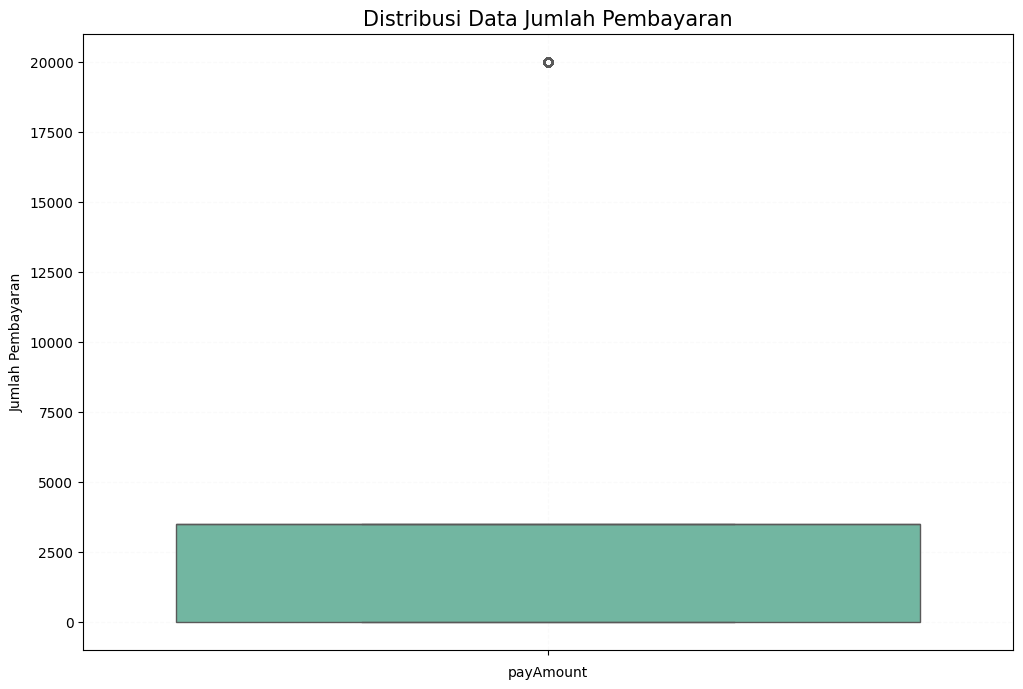

In [46]:
# Cek outlier pada kolom `payAmount`
plt.figure(figsize=(12,8))
sns.boxplot(df_tije, y='payAmount', palette='Set2')
plt.title('Distribusi Data Jumlah Pembayaran', fontsize=15)
plt.xlabel('payAmount')
plt.ylabel('Jumlah Pembayaran')
plt.grid(linestyle='--', alpha=0.05)
plt.show()

Jika dilihat pada hasil visualisasi, terlihat seperti ada outlier pada distribusi data kolom `payAmount` ini, namun sebenarnya ini bukan outlier melainkan perbedaan harga yang wajar karena layanan yang premium dan rute yang panjang. Maka kita tidak akan lakukan apa-apa pada outlier yang terdeteksi di kolom ini.

Selanjutnya kita akan cek duplikasi pada data yang kita miliki.

### Data Duplicates

Pada tahap terakhir data cleaning, kita akan cek duplikat dan menghapus setiap duplikat ada jika ditemukan ada duplikat.

In [47]:
display(df_tije.duplicated().value_counts(), df_tije.duplicated().sum())


False    37900
Name: count, dtype: int64

np.int64(0)

Tidak terdeteksi adanya duplikat pada data yang kita miliki, oleh karena itu tidak ada yang perlu kita tangani dari sisi duplikasi data.

Tahap data cleaning dan understanding sudah kita selesaikan, selanjutnya kita akan lihat kembali data yang sudah bersih. dan buat backup pada data tersebut.

### Data Bersih

Berikut beberapa informasi dari data yang sudah dibersihkan:

column_name       data_type  missing_value  unique  \
0            transID          object              0   37900   
1          payCardID           int64              0    2000   
2        payCardBank          object              0       6   
3        payCardName          object              0    1993   
4         payCardSex          object              0       2   
5   payCardBirthDate           int64              0      67   
6         corridorID          object              0     222   
7       corridorName          object              0     217   
8          direction         float64              0       2   
9         tapInStops          object              0    2571   
10    tapInStopsName          object              0    2602   
11     tapInStopsLat         float64              0    2587   
12     tapInStopsLon         float64              0    2458   
13      stopStartSeq           int64              0      67   
14         tapInTime  datetime64[ns]              0   37079   
15       tapOutStops          object              0    2231   
16   tapOutStopsName          object              0    2249   
17    tapOutStopsLat         float64           1344    2237   
18    tapOutStopsLon         float64           1344    2139   
19        stopEndSeq         float64           1344      74   
20        tapOutTime  datetime64[ns]           1344   35908   
21         payAmount         float64              0       3   

                                                     unique_sample  
0                                 [CYPJ209K7A50BV, UKGY282E8U60FI]  
1                          [4015639837568333411, 3578456570165787]  
2                                                     [bni, flazz]  
3                           [Latika Maheswara, Tgk. Tira Wahyudin]  
4                                                           [F, M]  
5                                                     [1956, 1960]  
6                                                    [D11, JAK.12]  
7          [Ragunan - Blok M via Kemang, Lebak Bulus - Pasar Baru]  
8                                                       [0.0, 1.0]  
9                                               [B06258P, B06734P]  
10                    [Jln. Pegangsaan Dua 7, Pusdiklat Kemenag 1]  
11                                          [-6.196082, -6.203866]  
12                                         [106.872812, 106.88575]  
13                                                        [11, 54]  
14  [2023-04-21T07:23:29.000000000, 2023-04-08T13:08:43.000000000]  
15                                              [B02853P, B01417P]  
16              [Pesona Kalisari, Institut Teknologi Budi Utomo 1]  
17                                          [-6.161055, -6.168147]  
18                                          [106.81172, 106.93956]  
19                                                    [47.0, 35.0]  
20  [2023-04-12T06:39:57.000000000, 2023-04-18T06:48:31.000000000]  
21                                               [3500.0, 20000.0]

<Axes: >

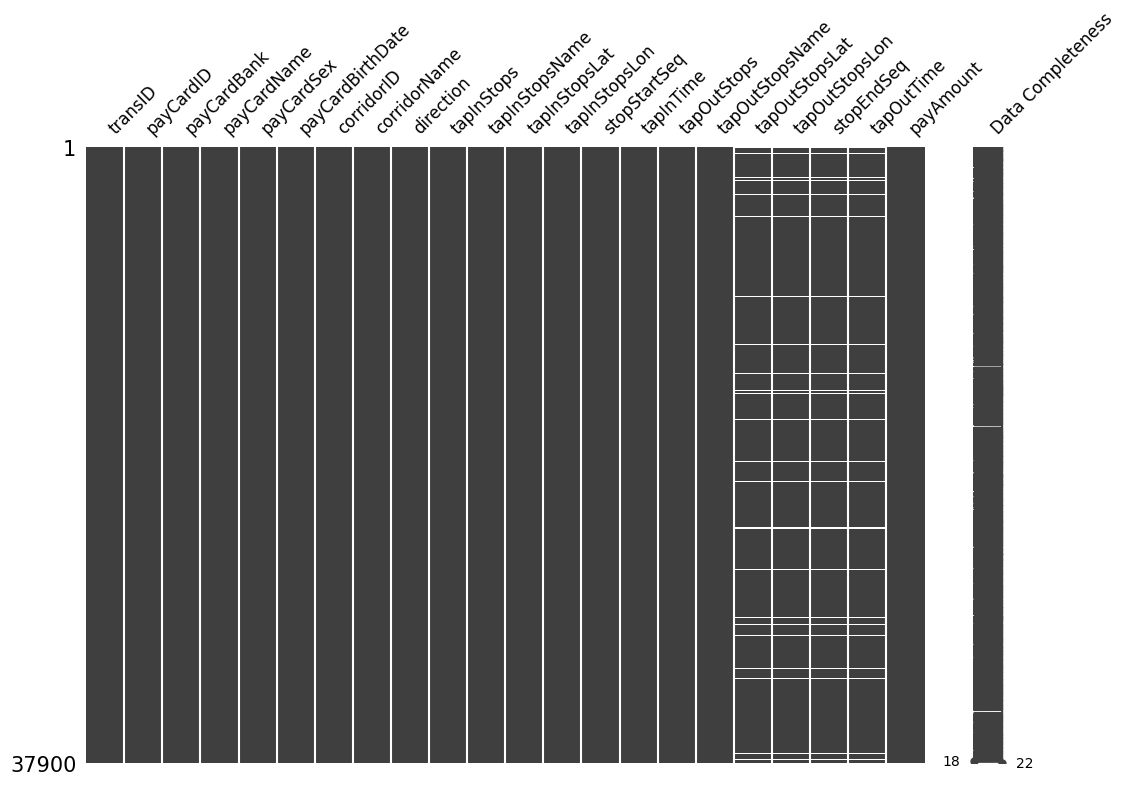

In [48]:
# Copy data yang sudah dibersihkan
df_tije_backup = df_tije.copy()

# Melihat beberapa informasi dari data yang sudah dibersihkan
column_item = []
for col in df_tije.columns:
    column_item.append([col, df_tije[col].dtype, df_tije[col].isnull().sum(),
                        df_tije[col].nunique(), list(df_tije[col].drop_duplicates().sample(2).to_numpy())]);

df_tije_desc = pd.DataFrame(columns=['column_name', 'data_type', 'missing_value', 'unique', 'unique_sample'],
                     data=column_item)

display(df_tije_desc)

mingo.matrix(df_tije, figsize=(12,8), fontsize=12, labels=True)

In [49]:
# Menghapus kolom yang tidak diperlukan
df_tije = df_tije.drop(columns=['payCardID', 'payCardBank', 'payCardName'])

Dari hasil pengecekan dan visualisasi diatas menandakan bahwa missing value yang dirasa perlu diisi sudah berhasil dilakukan pengisian dan missing value yang masih terlihat ada dalam data memang biarkan kosong karena alasan yang sudah disampaikan sebelumnya.

Missing value sebelum diisi terdeteksi sebanyak **14416**, dan setelah diisi tersisa **5376**, dengan total sebanyak **9040** missing value yang berhasil diisi. Kolom `payCardID`, `payCardBank` dan `payCardName` di hapus karena dirasa tidak akan dibutuhkan lagi dalam analisa kedepannya. Total baris dan kolom tersisa yaitu: Baris = 13,898 dan Kolom = 20.

## **Data Analysis**

Tahap cleaning data sudah kita selesaikan, maka berikutnya kita akan melakukan analisa pada rumusan masalah yang sudah kita buat sebelumnya secara berurutan. Sebelum ke analisa kita terlebih dahulu akan membuat kolom untuk mengklasifikasikan mikrotrans dan transportasi lainnya, dan juga membuat variabel baru yang berisi hanya data transaksi mikrotrans yang akan kita gunakan sepanjang analisa nantinya.

In [50]:
# Membuat kolom baru yang berisi jenis/moda transportasinya
df_tije['transportationType'] = df_tije.apply(lambda x: 'Mikrotrans' if x['corridorID'].startswith('JAK') and x['payAmount'] == 0 \
                                               else 'Regular Busway' if x['payAmount']==0 and not x['corridorID'].startswith('JAK') or x['payAmount']==3500
                                               else 'Royaltrans', axis=1)

# Membuat variabel baru yang hanya berisi data Mikrotrans, dan menghapus kolom yang tidak diperlukan, yang akan dipakai untuk analisa kedepannya
mikrotrans = df_tije[df_tije['transportationType'] == 'Mikrotrans']
mikrotrans

transID payCardSex  payCardBirthDate corridorID  \
6      HEMW326B9N91TV          M              1974     JAK.18   
7      XTKE052E5E87LN          F              1991     JAK.03   
14     LZFD368Q3E81HJ          M              1975     JAK.46   
19     ZYRL615G4C05RD          M              1981     JAK.88   
21     ZJVI960B9I42DA          F              1997     JAK.16   
...               ...        ...               ...        ...   
37891  XQDZ821C9G88JD          F              1966     JAK.30   
37892  YHJT665I6G08OS          M              1979     JAK.52   
37893  GNET512K3A93CA          F              2000     JAK.80   
37894  ZXVG342K6T27GU          F              2012     JAK.39   
37898  RGVK175U2U98UV          M              1976     JAK.13   

                                    corridorName  direction tapInStops  \
6                            Kalibata - Kuningan        0.0    B00243P   
7                           Lebak Bulus - Andara        1.0    B03416P   
14                      Pasar Minggu - Jagakarsa        1.0    B00608P   
19          Terminal Tanjung Priok - Ancol Barat        0.0    B00722P   
21                            Cililitan - Condet        0.0    B02144P   
...                                          ...        ...        ...   
37891                   Grogol - Meruya via Roxy        1.0    B01209P   
37892  Terminal Kalideres - Terminal Muara Angke        1.0    B01087P   
37893                  Rawa Buaya - Rawa Kompeni        0.0    B02485P   
37894                   Kalimalang - Duren Sawit        0.0    B04489P   
37898                Tanah Abang - Jembatan Lima        1.0    B02505P   

                       tapInStopsName  tapInStopsLat  tapInStopsLon  \
6                     Cervino Village      -6.224355      106.85165   
7                  SDN Pondok Labu 11      -6.313269      106.80221   
14     Gelanggang Remaja Pasar Minggu      -6.284615      106.83787   
19     Gunung Sahari Mangga Dua Timur      -6.137032      106.83254   
21             Lippo Mall Kramat Jati      -6.270835      106.86741   
...                               ...            ...            ...   
37891     Jln. Kartika Meruya Selatan      -6.203099      106.73673   
37892        Jln. Gunung Galunggung 1      -6.142286      106.73712   
37893                         MTsN 37      -6.097910      106.70237   
37894                   Sbr. SMPN 252      -6.239289      106.94229   
37898                  Museum Textile      -6.188656      106.80954   

       stopStartSeq           tapInTime tapOutStops  \
6                25 2023-04-03 06:58:21     Unknown   
7                 2 2023-04-03 06:44:24     B00899P   
14                5 2023-04-03 05:38:44     B01062P   
19               20 2023-04-03 06:43:49     B05989P   
21                4 2023-04-03 05:08:36     B01393P   
...             ...                 ...         ...   
37891            14 2023-04-19 16:31:09     B04071P   
37892            29 2023-04-28 16:38:56     B03207P   
37893            39 2023-04-19 08:16:10     B03053P   
37894            27 2023-04-14 11:36:12     B01624P   
37898            33 2023-04-15 19:59:26     B01787P   

                       tapOutStopsName  tapOutStopsLat  tapOutStopsLon  \
6                              Unknown             NaN             NaN   
7                           Jln. Baros       -6.311046       106.78400   
14                     Jln. Gabus Raya       -6.301222       106.83623   
19                  Jln. Ancol Barat 6       -6.124810       106.81983   
21               Jln. Mesjid Al Mabruk       -6.284350       106.85293   
...                                ...             ...             ...   
37891   Sbr. Masjid Nurul Falah Grogol       -6.170757       106.78477   
37892                  RSUD Cengkareng       -6.142238       106.73398   
37893          Puskesmas Kel. Kamal II       -6.100938       106.69786   
37894  Jln. Swakarsa III Pondok Kelapa       -6.244759       106.94249   
37898           

### **1. Demografi Pengguna**

Sebelum lanjut ke analisa, kita akan menambahkan kolom usia dan juga kelompok usia (Menurut BKKBN) yang akan dibutuhkan dalam analisa nantinya, serta juga membuat variabel yang berisi hanya data yang tipe transportasinya mikrotrans. Usia akan dikelompokkan lebih simpel menjadi: 

- 0-9 tahun = Anak-Anak
- 10-19 tahun = Remaja
- 20-34 tahun = Dewasa Awal
- 35-44 tahun = Dewasa Madya
- 45-54 tahun = Dewasa Akhir
- 55-59 tahun = Pra-Lansia
- 60+ tahun = Lansia

In [51]:
# Tahun saat ini
from datetime import datetime

# Menambahkan kolom usia dan kelompok usia
mikrotrans['age'] = 2023 - df_tije['payCardBirthDate']
mikrotrans['ageGroup'] = mikrotrans['age'].apply(lambda x: 'Anak-Anak' if x <= 9 else 'Remaja' if x <= 19 else\
                                           'Dewasa Awal' if x <= 34 else 'Dewasa Madya' if x <= 44 else 'Dewasa Akhir'\
                                            if x <= 54 else 'Pra-lansia' if x<= 59 else 'Lansia')

#### **A. Siapa kelompok usia terbanyak yang menggunakan mikrotrans?**

In [52]:
# Kelompok usia terbanyak terbanyak pengguna Mikrotrans
user_mikrotrans = mikrotrans.groupby('ageGroup')['transportationType'].count().reset_index(name='count')
user_mikrotrans = user_mikrotrans.sort_values('count', ascending=False)

In [53]:
# Visualisasi Barplot untuk melihat penggunaan Mikrotrans berdasarkan kelompok usia
bar_fig = px.bar(user_mikrotrans, x='ageGroup', y='count', color='ageGroup')

bar_fig.update_layout(title='Pengguna Mikrotrans berdasarkan Kelompok Usia',
                       xaxis_title='Kelompok Usia', yaxis_title='Total Pengguna', hovermode='closest')

bar_fig.update_traces(hovertemplate='Total Pengguna: %{y}')

bar_fig.show()

In [54]:
# Melihat presentasi kelompok usia yang menggunakan Mikrotrans
pie_fig = px.pie(user_mikrotrans, names='ageGroup', values='count', height=500, width=700)

pie_fig.update_layout(title={'text':'Presentase Kelompok Usia Pengguna Mikrotrans', 'x':0.5, 'xanchor':'center'},
                      legend_title='Kelompok Usia', hovermode='closest')

pie_fig.update_traces(hovertemplate='Kelompok Usia: %{label}<br>Pengguna: %{value}')

pie_fig.show()

Insight yang bisa diambil:
1.	Kelompok usia terbesar pengguna Mikrotrans adalah:
	- Dewasa Awal (25–34 tahun) -> 36.7%
	- Disusul oleh Dewasa Madya (35–44 tahun) -> 26.6%
2.	Kelompok usia produktif (25–44 tahun) secara total mencakup lebih dari 60% pengguna. Ini menunjukkan bahwa mikrotrans banyak digunakan oleh kalangan usia kerja aktif.
3.	Kelompok Remaja (10–19 tahun) dan Dewasa Akhir (45–54 tahun) juga masih cukup signifikan, masing-masing 16.2% dan 13.8%.
4.	Kelompok Pra-lansia (55–59 tahun) dan Lansia (≥60 tahun) hanya berkontribusi sedikit, dibawah 10%.

#### **B. Apakah pengguna mikrotrans lebih banyak laki-laki atau perempuan?**

Untuk menjawab pertanyaan ini maka kita akan kelompokkan dulu pengguna mikrotrans berdasarkan janis kelamin.

In [55]:
# Mengelompokkan pengguna Mikrotrans berdasarkan jenis kelamin
gender = mikrotrans.groupby(['payCardSex', 'transportationType']).size().reset_index(name='count')
gender

payCardSex transportationType  count
0          F         Mikrotrans   7422
1          M         Mikrotrans   6476

In [56]:
# Memvisualisasikan ke dalam barplot untuk melihat perbedaan antar jenis kelamin
pie_fig = px.pie(gender, names='payCardSex', values='count', height=500, width=500)

pie_fig.update_layout(title='Pengguna Mikrotrans Berdasarkan Jenis Kelamin', legend_title='Jenis kelamin', hovermode='closest')

pie_fig.update_traces(hovertemplate='Total Pengguna: %{value}')

pie_fig.show()


Insight yang dapat diambil:
1.	Pengguna perempuan (F) lebih banyak dibandingkan pengguna laki-laki (M).
	- Perempuan = 7422 pengguna
	- Laki-laki = 6476 pengguna
2.	Selisih ini menunjukkan bahwa perempuan lebih dominan dalam memanfaatkan layanan Mikrotrans.

#### **Kesimpulan dari analisa demografi pengguna:**

- Mikrotrans paling banyak dimanfaatkan oleh usia produktif, kemungkinan besar sebagai moda penghubung menuju tempat kerja atau aktivitas harian lainnya.
- Rendahnya persentase lansia dan pra-lansia dapat menandakan bahwa mikrotrans belum ramah lansia (aksesibilitas/fasilitas) atau kebutuhan mobilitas yang rendah bagi kaum lansia
- Perempuan menjadi pengguna terbanyak dari Mikrotrans, bisa jadi karena faktor:
	- Rute yang dekat dengan aktivitas rumah tangga/pasar/sekolah
	- Gratis dan aman

### **2. Waktu dan Pola Perjalanan**

Selanjutnya kita akan coba cek pola perjalanan dari Mikrotrans, dimana untuk menganalisa ini kita akan membutuhkan tambahan kolom yang berisi jam tap in (tapInHour), durasi perjalanan dalam menit (tripDuration) dan hari (dayName) yang akan kita tambahkan ke dalam dataset. 

In [57]:
# Mengekstrak jam perjalanan dari kolom `tapInTime`
mikrotrans['tapInHour'] = mikrotrans['tapInTime'].dt.hour

# Membuat kolom baru yang berisi durasi perjalanan permenit
mikrotrans['tripDuration'] = (mikrotrans['tapOutTime'] - df_tije['tapInTime']).dt.total_seconds() / 60

# Menambah kolom nama hari
mikrotrans['dayName'] = mikrotrans['tapInTime'].dt.day_name().astype('category')

# Menambah kolom tanggal
mikrotrans['date'] = pd.to_datetime(mikrotrans['tapInTime'].dt.date)

#### **A. Bagaimana pola jam sibuk penggunaan Mikrotrans sepanjang hari?**

In [58]:
# Mengelompokkan jam perjalanan berdasarkan jenis transportasi
peak_hours = mikrotrans.groupby(['transportationType', 'tapInHour']).size().reset_index(name='count')
peak_hours

transportationType  tapInHour  count
0          Mikrotrans          5   1169
1          Mikrotrans          6   2146
2          Mikrotrans          7   1051
3          Mikrotrans          8   1077
4          Mikrotrans          9   1024
5          Mikrotrans         10    116
6          Mikrotrans         11    137
7          Mikrotrans         12    123
8          Mikrotrans         13    142
9          Mikrotrans         14     75
10         Mikrotrans         15    147
11         Mikrotrans         16   1222
12         Mikrotrans         17   1916
13         Mikrotrans         18    917
14         Mikrotrans         19    932
15         Mikrotrans         20    894
16         Mikrotrans         21    810

In [59]:
# Memvisualisasikan peak hours ke dalam linechart
import plotly.express as px

line_fig = px.line(peak_hours, x='tapInHour', y='count', markers=True, 
              title='Jumlah Perjalanan Berdasarkan Jam Perjalanan')

line_fig.update_layout(
    xaxis_title='Jam Perjalanan',
    yaxis_title='Jumlah Perjalanan',
    xaxis=dict(dtick=1),
    hovermode='closest',)

line_fig.update_traces(hovertemplate='Jumlah Perjalanan: %{y}')
line_fig.show()

Insight yang dapat diambil:
- Puncak penggunaan terjadi dua kali:
    - Pagi hari: Puncak tertinggi terjadi pada jam 06:00, dengan 2,146 perjalanan.
    - Sore hari: Puncak signifikan kedua muncul pada jam 17:00, dengan total perjalanan 1,916.
- Jam sibuk pagi hari diperkirakan terjadi pada jam 05:00 hingga jam 09:00.
- Jam sibuk sore hari diperkirakan terjadi pada jam 16:00 hingga jam 21:00.
- Volume perjalanan drop drastis setelah jam 09:00, dan tetap rendah hingga jam 15:00.
- Paling rendah terlihat sekitar jam 14:00 dengan total hanya 75 perjalanan.
- Volume perjalanan menurun setelah jam 18:00, namun masih stabil hingga jam 20:00. Menunjukkan adanya penggunaan sekunder, mungkin untuk kegiatan sosial atau aktivitas malam hari, tapi bukan jam sibuk utama.

#### **B. Apakah rata-rata durasi perjalanan Mikrotrans meningkat pada jam sibuk?**

Sebelum melakukan analisa pada durasi, kita terlebih dulu memfilter nilai `null` yang ada pada `tripDuration` agar tidak mengganggu hasil perhitungan.
Nilai `null` ini dihasilkan dari data `tapOutTime` yang sebelumnya dibiarkan kosong untuk kebutuhan analisa gagal tap out. Karena pada case ini kita menggunakan nilai mean bukan total data, maka kita akan menghilangkannya dari daftar list `tripDuration`.

In [60]:
# Cek nilai null dari kolom `meanDuiration`
display(mikrotrans['tripDuration'].isnull().sum(), mikrotrans[mikrotrans['tripDuration'].isnull()]['tripDuration'])

np.int64(498)

6       NaN
30      NaN
206     NaN
280     NaN
399     NaN
         ..
37643   NaN
37688   NaN
37762   NaN
37777   NaN
37799   NaN
Name: tripDuration, Length: 498, dtype: float64

In [61]:
# Menghapus baris yang memiliki nilai null pada `tripDuration`
mikrotrans_duration = mikrotrans.dropna(subset=['tripDuration'], axis=0)
mikrotrans_duration['tripDuration'].isnull().sum()

np.int64(0)

In [62]:
# Mencari rata-rata durasi perjalanan berdasarkan jam mulai perjalanan
duration = mikrotrans_duration.groupby('tapInHour')['tripDuration'].mean().reset_index(name='meanDuration')
duration

tapInHour  meanDuration
0           5     43.569650
1           6     55.603388
2           7     68.595805
3           8     71.333269
4           9     71.201899
5          10     71.788889
6          11     68.326593
7          12     66.621148
8          13     70.308575
9          14     70.096528
10         15     78.518298
11         16     84.838109
12         17     84.314538
13         18     83.521066
14         19     83.100262
15         20     83.743314
16         21     83.569365

In [63]:
# Memvisualisasikan rata-rata durasi ke dalam linechart
import plotly.express as px

line_fig = px.line(duration, x='tapInHour', y='meanDuration', markers=True, 
              title='Rata-Rata Durasi Perjalanan Berdasarkan Jam Mulai Perjalanan')

line_fig.update_layout(
    xaxis_title='Jam Mulai Perjalanan',
    yaxis_title='Rata-Rata Durasi Perjalanan',
    xaxis=dict(dtick=1),
    hovermode='closest',)

line_fig.update_traces(hovertemplate='Rata-rata Durasi: %{y} menit')
line_fig.show()

Insight yang dapat diambil:
- Durasi perjalanan meningkat tajam dari pagi hingga sore
- Perjalanan yang dimulai sekitar jam 05:00 menunjukkan durasi rata-rata perjalanan terendah (sekitar 43.6 menit).
- Durasi meningkat stabil pada jam 06:00 hingga 08:00 dan bertahan di sekitar 65:75 menit sejak jam 08:00 sampai jam 14:00.
- Pada jam sibuk pagi sudah menunjukkan kenaikan durasi yang signifikan dari 55.6 menit (jam 06:00) -> 68 menit (jam 07:00) -> 71.2 menit (jam 09:00), mengindikasikan mulai terjadinya kemacetan atau waktu tunggu lebih lama.
- Durasi terus tinggi hingga sore hari (jam 16–21)
- Puncak terjadi sekitar jam 16:00 dengan durasi hampir 87 menit, lalu stabil sedikit menurun namun tetap tinggi hingga malam jam 21:00.

#### **C. Apakah terdapat perbedaan signifikan dalam rata-rata durasi perjalanan antar jam perjalanan (jam tap-in)??**

Untuk menguji apakah ada perbedaan yang signifikan dalam rata-rata durasi perjalanan antar jam, kita perlu mengambil masing-masing nilai dalam satu group jam yang sama dari jam 5 - 21. Mari kita pisahkan nilainya agar bisa dilakukan uji statisknya.

In [64]:
# Mengambil nilai durasi perjalanan dalam satu group jam tap in yang sama
groupped_duration = [item['tripDuration'].values for _, item in mikrotrans_duration.groupby('tapInHour')]
groupped_duration

[array([ 30.55      ,  22.15      ,  29.63333333, ...,  30.18333333,
        135.48333333,  93.05      ], shape=(1123,)),
 array([27.31666667, 46.93333333, 33.35      , ..., 21.25      ,
        60.48333333, 56.28333333], shape=(2081,)),
 array([ 42.46666667, 100.53333333, 111.98333333, ..., 135.11666667,
        170.23333333, 107.08333333], shape=(1013,)),
 array([ 42.11666667,  26.5       ,  43.25      , ...,  99.2       ,
         86.16666667, 136.33333333], shape=(1040,)),
 array([ 96.81666667,  40.68333333,  79.46666667,  56.86666667,
         29.23333333,  49.03333333,  53.21666667,  27.95      ,
         97.31666667,  59.33333333,  88.81666667,  22.63333333,
         48.96666667, 102.51666667, 113.25      ,  73.11666667,
         26.        ,  42.36666667,  22.5       ,  70.71666667,
         93.48333333,  34.41666667,  54.25      ,  80.41666667,
        101.53333333,  55.58333333,  86.98333333,  20.51666667,
         21.65      ,  31.15      ,  35.        ,  53.51666667,
      

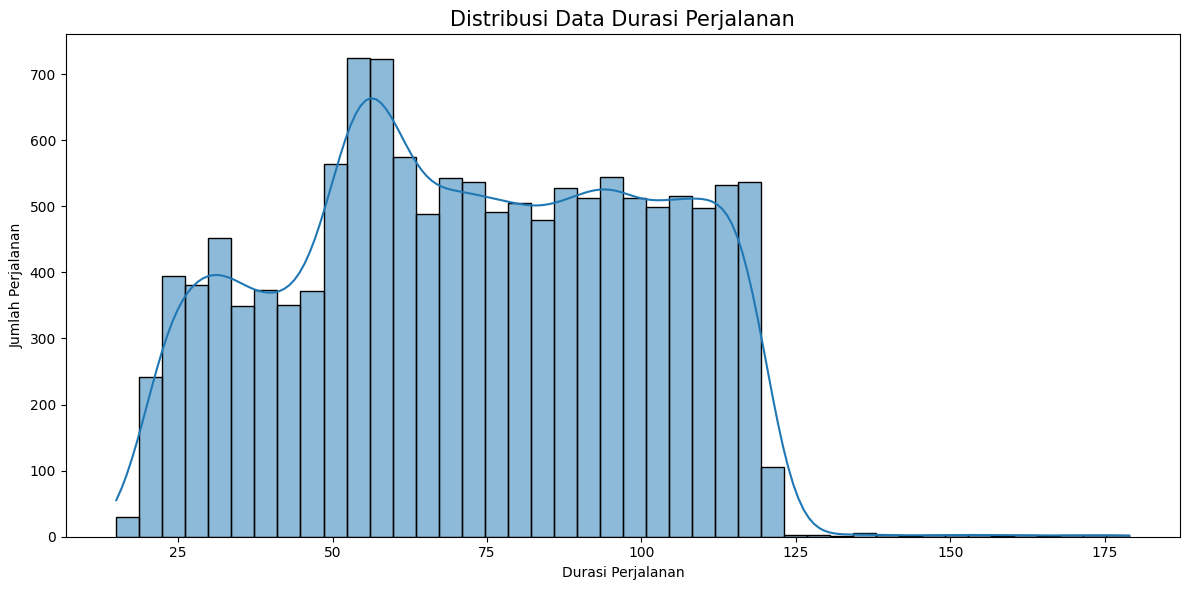

In [65]:
# Kita coba cek secara keseluruhan dengan visual apakah distribusi data tripDuration normal
plt.figure(figsize=(12, 6))

sns.histplot(mikrotrans_duration, x='tripDuration', kde=True)
plt.title(f'Distribusi Data Durasi Perjalanan', fontsize=15)
plt.xlabel('Durasi Perjalanan')
plt.ylabel('Jumlah Perjalanan')

plt.tight_layout()
plt.show()

In [66]:
# Karena dilihat dari grafik datanya tidak berdistribusi normal atau terlihat seperti uniform, maka kita gunakan metode uji statistik non parametrik dari 
from statsmodels.stats.diagnostic import lilliefors

stats, pvalue = lilliefors(mikrotrans_duration['tripDuration'])

H0 = 'Distribusi data normal'
H1 = 'Distribusi data tidak normal'

print(f'Nilai pvalue-nya adalah {pvalue}, sehingga dapat disimpulkan bahwa {H0 if pvalue > 0.05 else H1}')

Nilai pvalue-nya adalah 0.0009999999999998899, sehingga dapat disimpulkan bahwa Distribusi data tidak normal


In [67]:
# Terkonfirmasi dari hasil diatas bahwa distribusi tidak normal, 
# maka kita akan melakukan uji statistik non parametrik dengan kruskal-wallis dari hasil list yang diambil dari hasil groupby sebelumnya
from scipy.stats import kruskal

stats, pvalue = kruskal(*groupped_duration)

H0 = 'Tidak ada perbedaan rata-rata yang signifikan dalam durasi perjalanan berdasarkan jam perjalanan'
H1 = 'Setidak ada 1 perbedaan rata-rata yang signifikan dalam durasi perjalanan berdasarkan jam perjalanan'

print(f'Nilai pvalue-nya adalah {pvalue}, sehingga dapat disimpulkan bahwa {H0 if pvalue > 0.05 else H1}')

Nilai pvalue-nya adalah 0.0, sehingga dapat disimpulkan bahwa Setidak ada 1 perbedaan rata-rata yang signifikan dalam durasi perjalanan berdasarkan jam perjalanan


Insight yang bisa diambil:
- Dari hasil uji statistik, terkonfirmasi bahwa ada perbedaan yang signifikan setidaknya 1 kelompok dari beberapa kelompok yang diuji.
- Jika dikombinasikan dengan line chart di analisa sebelumn ya, dapat dikatakan bahwa jam keberangkatan berpengaruh nyata terhadap panjang durasi perjalanan.

#### **D. Apakah mikrotrans lebih banyak digunakan saat weekday atau weekend?**

In [68]:
# Kita akan urutkan dulu urutan harinya agar bisa di sort sesuai hari
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mikrotrans['dayName'] = pd.Categorical(mikrotrans['dayName'], categories=day_order, ordered=True)

In [69]:
# Selanjutnya kita kelompokkan total perjalanan berdasarkan hari
trip = mikrotrans.groupby('dayName').size().reset_index(name='count').sort_values(by='dayName')
trip

dayName  count
0     Monday   2503
1    Tuesday   2495
2  Wednesday   2498
3   Thursday   2500
4     Friday   2502
5   Saturday    674
6     Sunday    726

In [70]:
# Visualisasikan data diatas menggunakan barplot
trip_bar = px.bar(trip, x='dayName', y='count', color_discrete_sequence=['green'])

trip_bar.update_layout(title='Jumlah Perjalanan Berdasarkan Hari', xaxis_title='Hari', yaxis_title='Jumlah Perjalanan',
                       legend_title='Kategori Hari', hovermode='closest')

trip_bar.update_traces(hovertemplate='Jumlah Perjalanan: %{y}')    

trip_bar.show()

Insight yang bisa diambil:
- Volume perjalanan Mikrotrans jauh lebih tinggi pada hari kerja (weekday).
- Hari Senin hingga Jumat memiliki jumlah perjalanan yang konsisten tinggi (Sekitar +- 2500 perjalanan per hari).
- Penggunaan turun drastis pada akhir pekan (weekend) dengan hanya sekitar +- 600–700 perjalanan per hari.

#### **E. Apakah Mikrotrans digunakan secara konsisten sepanjang minggu, atau terdapat hari-hari dengan lonjakan/turun drastis?**

In [71]:
# Menggabungkan `date` dan `dayName` agar dapat total perjalanan berdasarkan tanggal dan kategori harinya
day_trip = mikrotrans.groupby(['date', 'dayName']).size().reset_index(name='count')
day_trip = day_trip[(day_trip['count'] != 0) & (day_trip['date']).isin(day_trip['date'].unique())]
day_trip

date    dayName  count
5   2023-04-01   Saturday      4
13  2023-04-02     Sunday      1
14  2023-04-03     Monday    588
22  2023-04-04    Tuesday    584
30  2023-04-05  Wednesday    586
38  2023-04-06   Thursday    582
46  2023-04-07     Friday    587
54  2023-04-08   Saturday    118
62  2023-04-09     Sunday    143
63  2023-04-10     Monday    588
71  2023-04-11    Tuesday    585
79  2023-04-12  Wednesday    588
87  2023-04-13   Thursday    746
95  2023-04-14     Friday    744
103 2023-04-15   Saturday    279
111 2023-04-16     Sunday    298
112 2023-04-17     Monday    741
120 2023-04-18    Tuesday    741
128 2023-04-19  Wednesday    741
136 2023-04-20   Thursday    587
144 2023-04-21     Friday    587
152 2023-04-22   Saturday    126
160 2023-04-23     Sunday    132
161 2023-04-24     Monday    586
169 2023-04-25    Tuesday    585
177 2023-04-26  Wednesday    583
185 2023-04-27   Thursday    585
193 2023-04-28     Friday    584
201 2023-04-29   Saturday    147
209 2023-04-30     Sunday    152

In [72]:
# Memvisualisasikan rata-rata durasi ke dalam linechart
line_fig = px.line(day_trip, x='date', y='count', markers=True, 
              title='Total Perjalanan Per-Hari', custom_data=['dayName'])

line_fig.update_layout(xaxis_title='Tanggal Perjalanan', yaxis_title='Total Perjalanan', xaxis=dict(dtick=1), hovermode='closest')

line_fig.update_xaxes(dtick='D1')
line_fig.update_traces(hovertemplate='Total Perjalanan : %{y}<br>Hari: %{customdata}')

line_fig.show()

Insight yang dapat diambil:
- Terdapat pola yang sangat jelas dan berulang setiap minggu.
- Hari kerja (Senin–Jumat) menunjukkan jumlah perjalanan yang tinggi dan relatif stabil, berkisar antara 580–750 perjalanan per hari.
- Akhir pekan (Sabtu dan Minggu) mengalami penurunan drastis, hanya sekitar 100–200 perjalanan per hari.
- Lonjakan dan penurunan ini terjadi secara berulang setiap minggu sepanjang bulan April, sehingga dapat dipastikan ini adalah pola sistematis, bukan karena anomali data.
- Pola ini menunjukkan karakteristik penggunaan Mikrotrans sebagai moda transportasi utama untuk aktivitas rutin, seperti: Berangkat dan pulang kerja, Berangkat dan pulang sekolah, atau mobilitas pengguna ke tempat perbelanjaan.

#### **Kesimpulan dari analisa Waktu dan Pola Perjalanan**

Dari hasil analisa diatas, dapat ditarik kesimpulan bahwa:

- Dari sisi pola perjalanan:

1. Pola perjalanan Mikrotrans sangat dipengaruhi oleh mobilitas pekerja atau anak sekolah/kuliah, dimana jam sibuk terjadi pada pagi dan sore hari. 
2. Mikrotrans tidak banyak digunakan untuk aktivitas tengah hari, seperti perjalanan rekreasional atau aktivitas non-komuter.
3. Mikrotrans benar-benar berperan sebagai moda komuter, sesuai tujuan awalnya sebagai feeder ke rute utama Transjakarta.
4. Tidak banyak dimanfaatkan di luar jam kerja, kemungkinan karena keterbatasan rute, frekuensi, atau kebutuhan masyarakat memang tidak tinggi di luar jam tersebut.

- Dari sisi Durasi Perjalanan:

1. Mikrotrans cenderung mengalami durasi perjalanan lebih lama pada jam sibuk dan tetap tinggi hingga sore hari. 
2. Kemungkinan karena kemacetan lalu lintas di rute mikrotrans, headway kendaraan atau keterbatasan armada, ataupun karena penumpang lebih banyak sehingga waktu naik turun bertambah

- Dari sisi penggunaan harian atau mingguan:

1. Mikrotrans paling aktif digunakan pada hari kerja, kemungkinan besar untuk keperluan komuter (berangkat & pulang kerja/sekolah).
2. Jarang digunakan untuk aktivitas akhir pekan seperti rekreasi, belanja, atau kegiatan non-komuter lainnya.
3. Mikrotrans secara jelas menunjukkan pola penggunaan berbasis kebutuhan komuter — digunakan secara intensif selama hari kerja dan jauh berkurang di akhir pekan. Ini 4. Sejalan dengan perannya sebagai feeder untuk rute Transjakarta utama dan mendukung aktivitas reguler masyarakat.

### **3. Wilayah dan Aksesibilitas**

Disini kita memerlukan tambahan data kecamatan dalam bentuk geojson yang akan kita download dari link berikut: https://github.com/SakifAbdillah/jakartaKecamatanGeoJSON?utm_source=chatgpt.com

#### **A. Kecamatan mana saja yang paling banyak menggunakan mikrotrans?**

In [73]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from shapely.geometry import Point

# Buat fungsi untuk menggabungkan koordinat tapIn dan tapOut
def stop_points(df):
    tapin = df[['tapInStopsLat','tapInStopsLon', 'corridorID', 'transID']].dropna()
    tapout = df[['tapOutStopsLat','tapOutStopsLon', 'corridorID', 'transID']].dropna()
    tapin.columns = tapout.columns = ['lat','lon', 'corridorID', 'transID']
    combined = pd.concat([tapin, tapout]).drop_duplicates(subset=['lat', 'lon', 'corridorID'])
    return combined

# Memanggil fungsi dan membuat dataframe
stop_tije = stop_points(mikrotrans)

# Import data kecamatan di jakarta dan menggabungkannya di dalam 1 variabel
gdf_kec = gpd.read_file('kecamatan.geojson')
gdf_point = gpd.GeoDataFrame(stop_tije, geometry=gpd.points_from_xy(stop_tije.lon, stop_tije.lat), crs='EPSG:4326')
gdf_joined = gpd.sjoin(gdf_point, gdf_kec, how='left', predicate='within')

# Mencari total titik halte di setiap kecamatan
halte_in_kec = gdf_joined['name'].value_counts().reset_index()
halte_in_kec.columns = ['name', 'jumlah_halte']

# Menggabungkan dataframe kecamatan sebelumnya dengan data total halte perkecamatan yang sudah di cari
df_kec = gdf_kec.merge(halte_in_kec, on='name', how='left')
df_kec['jumlah_halte'] = df_kec['jumlah_halte'].fillna(0).astype(int)
df_kec['availability'] = df_kec['jumlah_halte'] > 0

# Memvisualisasikan dalam folium dan choropleth
jakarta_map = folium.Map(location=[-6.2,106.85], zoom_start=11)

folium.Choropleth(geo_data=df_kec, data=df_kec, columns=['name', 'jumlah_halte'],
                  key_on='feature.properties.name', fill_color='YlGnBu', fill_opacity=0.7,
                  line_opacity=0.2, legend_name='Jumlah Halte Mikrotrans per Kecamatan').add_to(jakarta_map)

folium.GeoJson(df_kec, name='name', style_function=lambda feature: {'fillColor': 'transparent', 'color': 'black', 'weight': 1.2,},
               tooltip=folium.features.GeoJsonTooltip(fields=['name', 'jumlah_halte'], 
                                                      aliases=['Kecamatan', 'Jumlah Halte'], localize=True)).add_to(jakarta_map)

clustered = MarkerCluster().add_to(jakarta_map)
for _, geo in gdf_point.iterrows():
    folium.CircleMarker([geo.lat, geo.lon], radius=3, popup=geo.corridorID,
                        fill=True, fill_opacity=0.6).add_to(clustered)
    
for _, item in df_kec[~df_kec.availability].iterrows():
    kec = df_kec[df_kec['name']==item['name']]
    folium.GeoJson(kec, style_function=lambda x: {"fill":'transparent',"color":"black","weight":3}).add_to(jakarta_map)

jakarta_map

Insight yang dapat diambil:

- Sebagian besar wilayah DKI Jakarta telah memiliki akses terhadap mikrotrans, terlihat dari persebaran halte yang mencakup hampir seluruh kecamatan. Ini menunjukkan bahwa program mikrotrans gratis cukup menjangkau masyarakat luas, terutama di wilayah padat penduduk.
- 3 kecamatan dengan jumlah halte terbanyak ada di jakarta timur, yaitu Duren Sawit, Cilincing, Pulo Gadung.
- Daerah pinggiran jakarta selatan juga cukup banyak dibandingkan jakarta barat dan pusat.
- Beberapa wilayah padat di pusat Jakarta seperti Menteng dan Tanah Abang, memiliki jumlah halte mikrotrans yang lebih sedikit dibanding wilayah luar. 

#### **B. Apakah ada kecamatan yang tidak memiliki akses terhadap mikrotrans?**

In [74]:
list_no_mikrotrans = df_kec.loc[~df_kec['availability'], 'name'].tolist()

if list_no_mikrotrans:
    print(f"Terdapat {len(list_no_mikrotrans)} kecamatan tanpa akses mikrotrans, yaitu: {list_no_mikrotrans[-1]}")
else:
    print("Semua kecamatan sudah memiliki akses terhadap mikrotrans.")

#---------------------------------------------------------------------------

total_kec = len(df_kec)
blank_kec = len(df_kec[~df_kec['availability']])

print(f"{blank_kec} dari {total_kec} kecamatan ({blank_kec/total_kec:.2%}) tidak memiliki akses mikrotrans.")

Terdapat 1 kecamatan tanpa akses mikrotrans, yaitu: MAMPANG PRAPATAN
1 dari 42 kecamatan (2.38%) tidak memiliki akses mikrotrans.


Insight yang bisa diambil:

- Berdasarkan pemetaan data halte mikrotrans dan hasil perhitungan, terdapat 1 kecamatan di wilayah Jakarta yang sama sekali tidak memiliki halte mikrotrans, yaitu:  Mampang Prapatan. Artinya, dari total 42 kecamatan, hanya 2.38% yang belum memiliki akses terhadap layanan mikrotrans.

#### **Kesimpulan dari analisa Wilayah dan Aksesibilitas**

- Dari gambaran diatas, mengindikasikan bahwa layanan mikrotrans banyak digunakan di wilayah pinggiran yang kemungkinan besar menjadi wilayah permukiman yang mendukung mobilitas harian masyarakat ke pusat kota.
- Wilayah Mampang bisa dikategorikan sebagai blank spot, yaitu area tanpa akses layanan mikrotrans. Padahal Mampang merupakan wilayah padat dengan perkantoran dan permukiman. Ini menunjukkan potensi kesenjangan distribusi layanan.
- Selain itu juga bisa disebabkan karena di pusat kota sudah dilayani moda transportasi lain seperti bus reguler atau MRT, sehingga mikrotrans tidak dijadikan prioritas.
- Temuan ini memberi informasi bahwa meskipun layanan bersifat gratis, tidak semua warga Jakarta berkesempatan mengaksesnya, terutama yang tinggal di wilayah blankspot seperti Mampang Prapatan.
- Distribusi halte mikrotrans lebih mengarah ke area suburban atau penyangga kota. Ini memperkuat dugaan bahwa mikrotrans dimanfaatkan sebagai pengumpan (feeder) dari layanan Transjakarta lainnya.

### **4. Perilaku Pengguna pada saat Tap Out**

#### **A. Apakah tingkat gagal tap out pada mikrotrans lebih tinggi dibanding moda lain?**

In [75]:
# Menambahkan kolom tap_out status untuk mengidentifikasi tap_out yang gagal
df_tije['tapOutStatus'] = df_tije['tapOutTime'].apply(lambda x: 'Error' if x is pd.NaT else 'Success')
mikrotrans['tapOutStatus'] = mikrotrans['tapOutTime'].apply(lambda x: 'Error' if x is pd.NaT else 'Success')

# Menghitung jumlah tap_out yang gagal berdasarkan jenis transportasi
tapout_failed = df_tije.groupby(['transportationType', 'tapOutStatus']).size().reset_index(name='count')
tapout_failed = tapout_failed[tapout_failed['tapOutStatus']=='Error'].sort_values(by='count', ascending=False)
tapout_failed

transportationType tapOutStatus  count
2     Regular Busway        Error    791
0         Mikrotrans        Error    498
4         Royaltrans        Error     55

In [76]:
# Memvisualisasikan hasil ke dalam bar chart
pie_fig = px.pie(tapout_failed, names='transportationType', values='count', height=500, width=700)

pie_fig.update_layout(title='Jumlah Gagal Tap out Berdasarkan Jenis Transportasi', hovermode='closest')

pie_fig.update_traces(hovertemplate='Jumlah Gagal Tap out: %{value}')

pie_fig.show()

Insight yang dapat diambil:

Walaupun mikrotrans merupakan moda yang gratis, tingkat kegagalan tap out-nya cukup tinggi, yakni menempati posisi kedua setelah regular busway dengan jumlah 498 kali transaksi atau 37.1% dari total gagal tap out semua moda transportasi. Ini menunjukkan bahwa penggunaan mikrotrans tetap disiplin mengikuti aturan tap in-tap out, meskipun tidak ada biaya tambahan yang dikeluarkan pengguna.

#### **B. Apakah ada perbedaan rata-rata usia pengguna yang kemungkinan sukses dan gagal tap out?**

In [77]:
# Kita kelompokkan dulu usia pengguna yang gagal dan sukses tap out
succes_tapout = mikrotrans[mikrotrans['tapOutStatus']=='Success']['age']
error_tapout = mikrotrans[mikrotrans['tapOutStatus']=='Error']['age']

# Kemudian kita uji kenormalan datanya
from scipy.stats import shapiro

normal_test_data = [[succes_tapout], [error_tapout]]

for i, item in enumerate(normal_test_data):
    stats_shapiro, pvalue_shapiro = shapiro(item)
    H0 = 'Distribusi data normal'
    H1 = 'Distribusi data tidak normal'
    print(f'Data ke-{i+1} Nilai pvalue-nya adalah {pvalue_shapiro}, sehingga dapat disimpulkan bahwa {H0 if pvalue_shapiro > 0.05 else H1}')

Data ke-1 Nilai pvalue-nya adalah 5.139020388535545e-38, sehingga dapat disimpulkan bahwa Distribusi data tidak normal
Data ke-2 Nilai pvalue-nya adalah 1.3159395304559492e-06, sehingga dapat disimpulkan bahwa Distribusi data tidak normal


In [78]:
# Dari hasil uji normality diketahui bahwa data tidak berdistribusi normal, jadi kita gunakan man-whitney u-test untuk uji statistiknya
from scipy.stats import mannwhitneyu

stats_whitney, pvalue_whitney = mannwhitneyu(succes_tapout, error_tapout, alternative='two-sided')

H0 = 'Tidak ada perbedaan rata-rata usia yang signifikan antara yang berhasil dan gagal tap out'
H1 = 'Ada perbedaan rata-rata usia yang signifikan antara yang berhasil dan gagal tap out'

print(f'Nilai pvalue-nya adalah {pvalue_whitney}, sehingga dapat disimpulkan bahwa {H0 if pvalue_whitney > 0.05 else H1}')

Nilai pvalue-nya adalah 0.7151569897382418, sehingga dapat disimpulkan bahwa Tidak ada perbedaan rata-rata usia yang signifikan antara yang berhasil dan gagal tap out


Insight yang dapat diambil:

- Hasil uji Shapiro-Wilk menunjukkan bahwa distribusi usia pengguna (baik yang berhasil maupun gagal tap out) tidak mengikuti distribusi normal (p-value < 0.05).
- Hasil Uji Mann-Whitney U menghasilkan p-value = 0.715 yang lebih besar dari 0.05, yang artinya tidak terdapat perbedaan rata-rata usia yang signifikan antara pengguna yang berhasil dan gagal tap out atau dapat dikatakan usia bukan faktor utama yang memengaruhi kegagalan tap out.

#### **C. Kelompok Usia mana yang banyak gagal dalam melakukan tap out?**

In [79]:
# Menghitung jumlah tap_out yang gagal berdasarkan Kelompok Usia
tapout_failed_by_age_group = mikrotrans.groupby(['ageGroup', 'tapOutStatus']).size().reset_index(name='count')
tapout_failed_by_age_group = tapout_failed_by_age_group[tapout_failed_by_age_group['tapOutStatus']=='Error'].sort_values(by='count', ascending=False)
tapout_failed_by_age_group

ageGroup tapOutStatus  count
2    Dewasa Awal        Error    174
4   Dewasa Madya        Error    136
10        Remaja        Error     85
0   Dewasa Akhir        Error     61
8     Pra-lansia        Error     34
6         Lansia        Error      8

In [80]:
# Memvisualisasikan hasil diatas dengan Barplot
bar_fig = px.bar(tapout_failed_by_age_group, x='ageGroup', y='count', color_discrete_sequence=['green'])

bar_fig.update_layout(title='Jumlah Gagal Tap out Berdasarkan Kelompok Usia', xaxis_title='Kelompok Usia',
                       yaxis_title='Jumlah Gagal Tap out', hovermode='closest')

bar_fig.update_traces(hovertemplate='Jumlah Gagal Tap out: %{y}')

bar_fig.show()

Insight yang dapat diambil:

- Kelompok usia Dewasa Madya (35-44 tahun) dan Dewasa Awal (20-34 tahun) memiliki jumlah kegagalan tap out tertinggi dibanding kelompok usia lainnya.
- Transaksi gagal tap out pada usia Dewasa Madya mencapai 161 kali.
- Sedangkan transaksi gagal tap out pada Dewasa Awal mencapai 159 kali.

#### **Kesimpulan dari analisa Perilaku Pengguna pada saat Tap Out**
- Fakta bahwa masih banyak pengguna mikrotrans yang tidak tap out dengan benar bisa menunjukkan beberapa hal:
	- Sosialisasi atau edukasi penggunaan mikrotrans mungkin belum merata.
	- Pengguna menganggap tap out tidak penting karena tidak berbayar.
	- Sistem tap out di mikrotrans bisa jadi lebih membingungkan atau akses alat pembacanya kurang optimal dibanding moda lain.
- Meskipun Dewasa Awal dan Dewasa Madya merupakan kelompok dengan jumlah pengguna tertinggi, kelompok ini juga mencatat tingkat kegagalan tap out yang signifikan.
- Kelompok usia remaja, pralanjut usia, dan lansia justru memiliki angka kegagalan lebih rendah, namun hal ini juga bisa disebabkan karena Frekuensi perjalanan lebih rendah atau mereka lebih hati-hati.
- Meskipun ada variasi kegagalan tap out di tiap kelompok usia, secara statistik usia tidak berpengaruh secara signifikan terhadap kemungkinan gagal tap out.
- Hal ini memperkuat dugaan bahwa masalah tap out mungkin lebih dipengaruhi oleh faktor lain, seperti:
	- Kurangnya edukasi atau sosialisasi sistem tap out
	- Kurangnya alat pembaca tap out (reader) yang tersedia di mikrotrans
	- Perbedaan jenis kendaraan (angkot -> pintu terbuka, tidak terkondisikan)


## **Kesimpulan dan Rekomendasi**



#### **Kesimpulan**

**1. Profil Demografi Pengguna**
- Pengguna terbanyak adalah perempuan dan usia produktif (20–45 tahun), yang menunjukkan relevansi Mikrotrans untuk kebutuhan harian seperti ke kantor, sekolah, atau pasar.
- Partisipasi lansia sangat rendah, mengindikasikan kemungkinan kurang ramah lansia (aksesibilitas/fasilitas).

**2. Pola Perjalanan dan Durasi**
- Jam sibuk (pagi & sore) menunjukkan lonjakan signifikan dalam penggunaan dan durasi perjalanan lebih lama, kemungkinan akibat:
	- Kemacetan lalu lintas
	- Kepadatan penumpang
	- Interval kedatangan armada yang tidak optimal
- Penggunaan Mikrotrans terpusat pada hari kerja (Senin–Jumat), menunjukkan bahwa moda ini digunakan sebagai alat komuter bagi pekerja dan pelajar.
- Aktivitas Mikrotrans menurun drastis di akhir pekan, mengindikasikan ketergantungan pengguna pada moda ini hanya untuk kebutuhan rutin, bukan rekreasi.

**3. Distribusi Akses Wilayah**
- Hampir seluruh kecamatan di Jakarta telah memiliki akses terhadap Mikrotrans.
- Layanan mikrotrans banyak digunakan di wilayah pinggiran yang kemungkinan besar menjadi wilayah permukiman yang mendukung mobilitas harian masyarakat ke pusat kota.
- Namun, ditemukan satu kecamatan tanpa akses halte sama sekali, yaitu Mampang Prapatan, yang merupakan area padat aktivitas. Hal ini dapat mengindikasikan bahwa:
	- Meskipun layanan bersifat gratis, tidak semua warga Jakarta berkesempatan mengaksesnya, terutama yang tinggal di wilayah blankspot seperti Mampang Prapatan.
	- Selain itu juga bisa disebabkan karena di pusat kota sudah dilayani moda transportasi lain seperti bus reguler atau MRT, sehingga mikrotrans tidak dijadikan prioritas.
- Distribusi halte mikrotrans lebih mengarah ke area suburban atau penyangga kota. Ini memperkuat dugaan bahwa mikrotrans dimanfaatkan sebagai pengumpan (feeder) dari layanan Transjakarta lainnya.

**4. Perilaku Tap Out**
- Mikrotrans memiliki tingkat gagal tap out yang cukup tinggi, meskipun gratis.
- Kelompok usia Dewasa Awal dan Dewasa Madya mencatat tingkat kegagalan tap out yang paling tinggi.
- Kelompok usia remaja, pra-lansia, dan lansia justru memiliki angka kegagalan lebih rendah, namun hal ini juga bisa disebabkan karena frekuensi perjalanan lebih rendah atau mereka lebih hati-hati.
- Statistik menunjukkan tidak ada perbedaan signifikan secara usia, artinya kegagalan ini kemungkinan besar disebabkan oleh sistem:
	- Pembaca kartu tap out yang bekerja kurang optimal.
	- Edukasi yang belum menyeluruh, sehingga pengguna menganggap tap out tidak penting karena tidak berbayar.
	- Desain angkot yang kurang mendukug untuk melakukan tap out dengan mudah.

#### **Rekomendasi Tindak Lanjut**

**1. Perluasan Akses**
- Lakukan kajian penambahan halte di Mampang Prapatan agar tidak terjadi ketimpangan layanan.
- Petakan blankspot lainnya yang mungkin muncul di data waktu mendatang.
- Jakarta Barat yang terlihat masih sedikit halte dan penggunaan Mikrotrans perlu di tinjau ulang apakah diperlukan tambahan rute dan armada.

**2. Operasional & Armada**
- Evaluasi dan optimalkan armada pada jam 16:00–18:00, karena waktu ini menunjukkan durasi terpanjang dan beban tertinggi.
- Pertimbangkan penambahan unit kendaraan pada waktu sibuk.
- Skalakan ulang frekuensi keberangkatan angkutan pada jam sibuk dan tidak sibuk agar dapat durasi yang optimal.
- Modifikasi angkutan agar lebih nyaman untuk ditumpangi, seperti penambahan ac pada angkot.
- Sosialisasikan kepada driver agar tidak terlalu terburu buru pada saat menurunkan atau menaikkan penumpang disetiap halte agar mikrotrans bisa lebih ramah terhadap kelompok usia Dewasa Akhir sampai dengan lansia.

**3. Strategi Akhir Pekan**
- Karena penggunaan Mikrotrans menurun drastis di akhir pekan, rekomendasi yang dapat diberikan adalah melakukan eksperimen untuk membuka rute-rute baru hanya di akhir pekan dengan tujuan tempat-tempat rekreasi di masing-masing wilayah.
- Kurangi armada atau atur frekuensi keberangkatan pada rute reguler di akhir pekan dan alokasikan ke rute-rute rekreasi yang di buat.

**4. Perbaikan Sistem Tap Out**
- Tingkatkan fasilitas pembaca kartu di Mikrotrans.
- Tambahkan pembaca kartu di bagian belakang untuk memudahkan penumpang belakang melakukan tap in dan out.
- Edukasi pengguna usia produktif mengenai pentingnya tap out, agar sistem data perjalanan tetap akurat dan subsidi tepat sasaran.


## **Penutup**

Kehadiran Mikrotrans sebagai layanan transportasi publik gratis patut diapresiasi sebagai langkah progresif untuk meningkatkan mobilitas warga Jakarta. Upaya ini menunjukkan keberpihakan pada aksesibilitas dan pengurangan beban biaya transportasi, khususnya bagi kelompok ekonomi rentan.

Namun demikian, kebijakan yang baik tak cukup hanya gratis — ia harus adil. Selama masih ada wilayah yang belum terlayani dan kelompok pengguna yang belum merasakan manfaat secara optimal, kita harus berani bertanya: apakah layanan ini benar-benar untuk semua, atau hanya untuk mereka yang kebetulan tinggal di rute yang tersedia?

## **Data yang akan digunakan untuk kebutuhan visualisasi dashboard**

In [81]:
# Tambahan data untuk visualisasi map di tableau
mikrotrans_final = mikrotrans.merge(gdf_joined[['transID', 'name']], on='transID', how='left')
mikrotrans_final.head()

transID payCardSex  payCardBirthDate corridorID  \
0  HEMW326B9N91TV          M              1974     JAK.18   
1  XTKE052E5E87LN          F              1991     JAK.03   
2  LZFD368Q3E81HJ          M              1975     JAK.46   
3  LZFD368Q3E81HJ          M              1975     JAK.46   
4  ZYRL615G4C05RD          M              1981     JAK.88   

                           corridorName  direction tapInStops  \
0                   Kalibata - Kuningan        0.0    B00243P   
1                  Lebak Bulus - Andara        1.0    B03416P   
2              Pasar Minggu - Jagakarsa        1.0    B00608P   
3              Pasar Minggu - Jagakarsa        1.0    B00608P   
4  Terminal Tanjung Priok - Ancol Barat        0.0    B00722P   

                   tapInStopsName  tapInStopsLat  tapInStopsLon  ...  \
0                 Cervino Village      -6.224355      106.85165  ...   
1              SDN Pondok Labu 11      -6.313269      106.80221  ...   
2  Gelanggang Remaja Pasar Minggu      -6.284615      106.83787  ...   
3  Gelanggang Remaja Pasar Minggu      -6.284615      106.83787  ...   
4  Gunung Sahari Mangga Dua Timur      -6.137032      106.83254  ...   

   payAmount transportationType age      ageGroup  tapInHour  tripDuration  \
0        0.0         Mikrotrans  49  Dewasa Akhir          6           NaN   
1        0.0         Mikrotrans  32   Dewasa Awal          6     27.316667   
2        0.0         Mikrotrans  48  Dewasa Akhir          5     30.550000   
3        0.0         Mikrotrans  48  Dewasa Akhir          5     30.550000   
4        0.0         Mikrotrans  42  Dewasa Madya          6     46.933333   

   dayName       date  tapOutStatus          name  
0   Monday 2023-04-03         Error         TEBET  
1   Monday 2023-04-03       Success      CILANDAK  
2   Monday 2023-04-03       Success  PASAR MINGGU  
3   Monday 2023-04-03       Success  PASAR MINGGU  
4   Monday 2023-04-03       Success    PADEMANGAN  

[5 rows x 28 columns]

In [82]:
mikrotrans_final.to_csv('Public_Transportation_Transaction_Transjakarta_final.csv', index=False)